# CLASSIFICATION OF R/SOURDOUGH POSTS PER FLAIR TAGS: 01 - EDA

## 1) Introduction: 

### 1.1) Presentation of the problem
Reddit is an American social news aggregation, web content rating, and discussion website where registered members can submit content in the form of text, images, videos or links. Other members can then discuss and vote (up- or down-) on the quality of said content. All content is classified by subreddit on which essentially, are communities organized around specific areas of interest. Self described as the frontpage of the internet, Reddit counted more than 138,000 subreddits in 2018 and constitutes a very valuable source of informations for who knows where to lookf for.

The end of 2019 saw the rise of COVID-19 worldwide, and with lockdowns and temporary layoffs, people engaged more heavily in hobbies that could be enjoyed at home, causing a search for information. An example of such of phenomenon is the rise of bread baking, and more particularly of sourdough bread baking, which allows people to bake bread with an at home maintained starter, without the need to buy commercial yeast, for which a shortage happened at the beginning of the pandemic. This rise in interest could be observed on Reddit with a rise of subscriber on the r/sourdough subreddit, as seen on the figure below.


In [1]:
# Loading libraries 
from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from itertools import compress

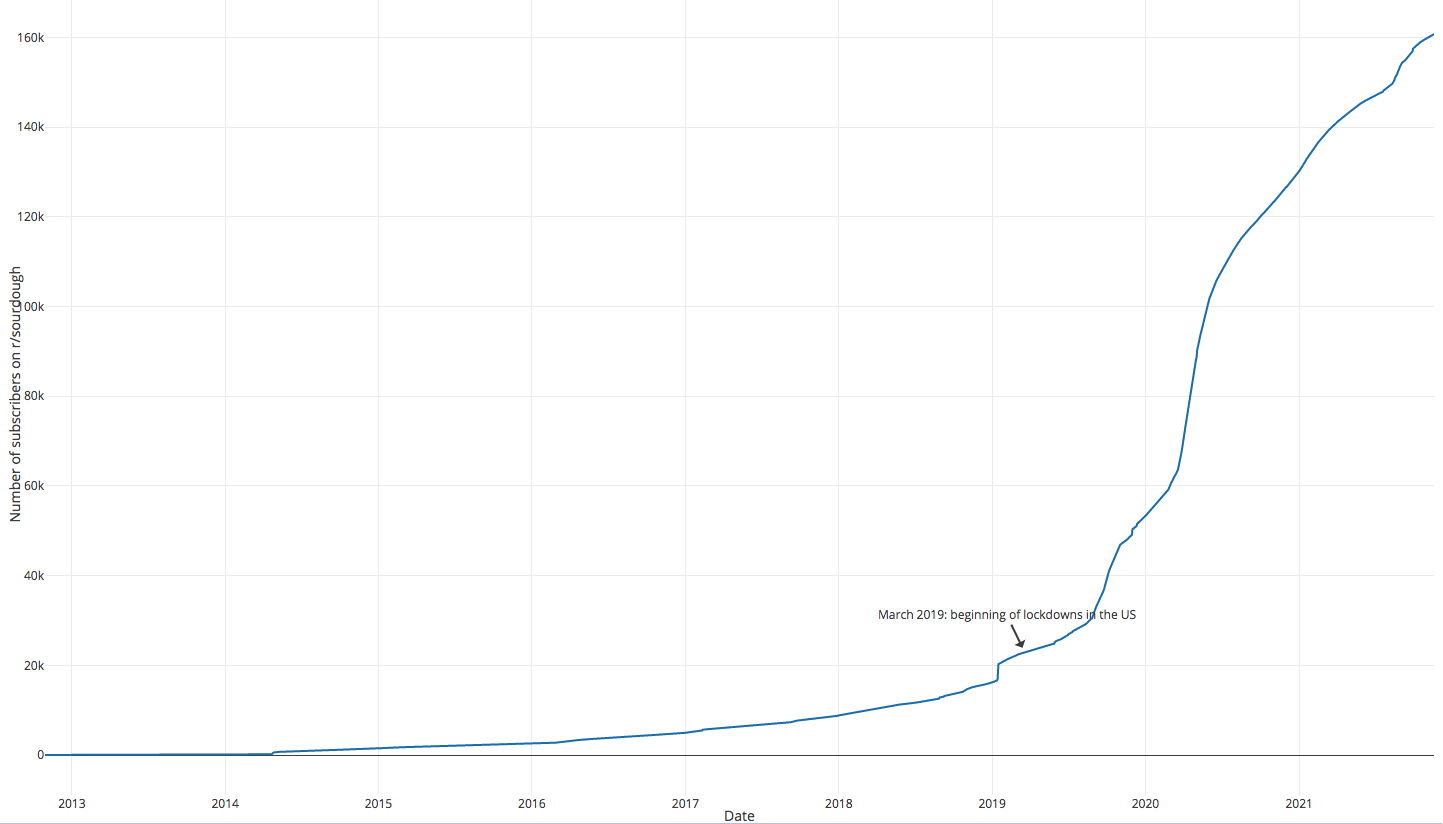

In [2]:
PATH = 'subscribers_all_time.png'
Image(filename = PATH, width=1082, height=618)

Posts on this subreddit can be tagged with categories called flairs. This helps identify easily what type of information is conveyed by the post. For example, a flair named "Help!" means that the poster needs some kind of advice, while a flair named "Crumbshot" indicates that the post primary function is to share a photo of the loaf's crumb. 
Flairs are useful for navigating the subreddit and spot at first glance the post that interest us the most. They can also be used to filter the post that are displyed while navigating the site. 

However, despite their usefulness, not all posts are tagged with flairs. For starters, flairs might not have been implemented at the creation of the subreddit. Alternatively, it is not mandatory to assign a flair when creating a post. 

Thus, in order to improve user experience on the site, we propose to use machine learning techiniques to predict the flair category of a reddit post on the r/sourdough subreddit, in order to retroactively flags post without flairs.

### 1.2) Project outline

This project can be roughly sectionned into 3 parts: 
1. The exploratory data analysis:
During this part, we will explore the data in order to get a better insight into the dataset, as well as cleaning and preprocessing the data prior to the machine learning step. 
2. The Machine learning application: 
During this part, we will use the preprocessed data as input indifferent machine learning algorithms to build classifiers able to predict the flairs of the posts 
3. Results and discussion 
During this part, we will collect the results obtained with all methods used, compare them and discuss them as well as the short comings and perspectives for the project. 




### 1.3) Aim of this notebook






This is the first notebook of the reddit posts classification project. The aim of this project is to build a classifier to classify posts in the r/sourdough subreddit according to flair tags. Flair tags are labels provided by the users to help others know at first sight which type of discussion is expected in the comments. However, not all posts are tagged: 
First, tags were only introduced recently, after the popularity of the subreddit picked up. 
Secondely, tagging a post is not mandatory. 

It is possible to look for all posts tagged with the same flair, thus allowing people to access easily to the types of discussions they are looking for. Being able to build a classifier that would be able to retroactively flag posts, would thus be useful to access easily earlier discussions, without having to search for specific terms. 



The goal of this jupyter notebook is to perform the data exploration on our datasets in order to help us make informed decisions for the preprocessing and the treatment of our data. 

At the end of this notebook, we expect  to have: 
* A better understanding of the data
* A cleaned and preprocessed dataset, ready for the machine learning step 



## 2) Presentation of the data

For this project, we are interested in the text content of reddit posts and their analysis in order to classify said posts according to useful flairs. These text content can be found in 3 forms: 
* the title of the posts: which summarizes what the author wants to convey
* the text content of the posts: the corpus of the post if it is a text post or legends for images 
* the comments: reactions and discussions with other users.

In order to retrieve this data, we decided to scrape them from the Reddit website. The official Reddit API only authorizes a user to retrieve 100 posts at a time. As we are interested in posts on a large time period, covering way more thatn 100 posts, we opted for the use of the PushShift API, which allows us to loop through the posts between 2 dates and import data, 100 posts at a time until all posts of the deignated time periods have been retrieved. 

For more details on the scraping process, please refer to the collecting_data jupyter notebook. 

Two raw dataset are extracted from the r/sourdough subreddit: 
The first dataset collects posts from the r/sourdough subreddit, between the 17.11.2020 and the 07.12.2021, which represents 18,138 posts. Features that were collected include:
sub_id, sub, title, text, permalink, created,numComms
* Post ID: id of the post.
* Subreddit: name of the subreddit the post belongs to.  
* Title:  title of the post.
* OP Text: Text content of the post.
* Url: url of the post.
* Publish Date: date of publication.
* Total No. of Comments. 
* Flair: flair tags of the post. 

The second dataset contains all comments posted on the r/sourdough subreddit during the same period of time. Features collected include: 
* Comment ID: id of the comment. 
* Post ID: id of the post the comment belongs to. 
* Body: Text content of the comment.
Below is displayed a sample of the Posts dataset:

### 2.1) Posts dataset overview: 

Let's start with an overview of the posts dataset. A sample of this dataset is displayed below: 

In [3]:
# Load data
sdf= pd.read_csv('data/sourdough_flairs_df.csv') 
sdf.head()

,Post ID,Subreddit,Title,OP Text,Permalink,Publish Date,Flair
0,jw2x62,Sourdough,Feeling the flair????,[deleted],/r/Sourdough/comments/jw2x62/feeling_the_flair/,2020-11-17 23:17:41,Post flairs are now active
1,jw30n5,Sourdough,2 month old starter salvageable?,NaN,/r/Sourdough/comments/jw30n5/2_month_old_start...,2020-11-17 23:22:47,
2,jw32v5,Sourdough,Is this water? It smells like alcohol,[deleted],/r/Sourdough/comments/jw32v5/is_this_water_it_...,2020-11-17 23:25:56,Newbie help
3,jw36fb,Sourdough,"Practicing and practicing, getting better. Fin...",NaN,/r/Sourdough/comments/jw36fb/practicing_and_pr...,2020-11-17 23:31:02,Rate/critique my bread
4,jw3ckx,Sourdough,First bake in a few months.,NaN,/r/Sourdough/comments/jw3ckx/first_bake_in_a_f...,2020-11-17 23:40:06,


In [4]:
print('There are {} duplicated records in the posts dataset.'.format(sdf.duplicated().sum()))

There are 0 duplicated records in the posts dataset.


As there are no duplicated records to drop, we continue with the overall overview of the dataset: 

In [5]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18138 entries, 0 to 18137
Data columns (total 7 columns):
Post ID         18138 non-null object
Subreddit       18138 non-null object
Title           18131 non-null object
OP Text         3685 non-null object
Permalink       18138 non-null object
Publish Date    18138 non-null object
Flair           18138 non-null object
dtypes: object(7)
memory usage: 992.0+ KB


The raw dataset contains 18138 observations and 7 features that are strings: 
* Post ID 
* Subreddit
* Title 
* OP text
* Url 
* Publish Date 
* Flair 

Even though the summary provided by the .info() method displays that we do not have missing data in most of the variables, this is actually not true. For most of the strings variables, the missing values are denoted by an empty string, except for OP Text where they can also be denoted as 'Nan'. 

Thus, the number of missing values in the data are: 

In [6]:
sdf.apply(lambda x: [(str(y)==" ") |(str(y) == "nan") for y in x], axis = 0).sum()

Post ID             0
Subreddit           0
Title               7
OP Text         14453
Permalink           0
Publish Date        0
Flair            8544
dtype: int64

As we can see, 8544 of the 18138 posts we collected over the past two years have no Flair tags. If we only consider data where the flair is not missing:

In [7]:
sdf_flairs = sdf.loc[sdf['Flair'] != " ", :].copy()
sdf_flairs.shape

(9594, 7)

The proportions of missing values are now:

In [8]:
sdf_flairs.apply(lambda x: [(str(y)==" ") |(str(y) == "nan") for y in x], axis = 0).sum()*100 / sdf_flairs.shape[0]

Post ID          0.000000
Subreddit        0.000000
Title            0.031270
OP Text         79.664374
Permalink        0.000000
Publish Date     0.000000
Flair            0.000000
dtype: float64

1 feature still have a very large number of  missing values: OP Text.
We will investigate this further during the exploratory data analysis (EDA).

We can also see that a very small proportion of posts also have a missing title:


In [9]:
sdf_flairs.loc[[(str(y)==" ") |(str(y) == "nan") for y in sdf_flairs['Title']], :]

,Post ID,Subreddit,Title,OP Text,Permalink,Publish Date,Flair
6601,laqa8h,Sourdough,NaN,NaN,/r/Sourdough/comments/laqa8h/私のカボチャスパイスサワードウにと...,2021-02-02 08:30:39,Ear ear
9482,mfukc9,Sourdough,NaN,NaN,/r/Sourdough/comments/mfukc9/_/,2021-03-29 19:22:24,Crumbshot
13596,ogehw8,Sourdough,NaN,NaN,/r/Sourdough/comments/ogehw8/_/,2021-07-08 21:28:01,Sourdough


In [10]:
sdf_eda = sdf_flairs.loc[[(str(y)!=" ") & (str(y) != "nan") for y in sdf_flairs['Title']], :].copy()
sdf_eda.shape

(9591, 7)

### 2.2) Comments dataset overview: 

Now let's focus on the comments dataset. A sample of this dataset is displayed below: 

In [11]:
comms= pd.read_csv('data/sourdough_comments_df.csv') 
comms.head()

,Comment ID,Post ID,Body
0,gcnn13s,t3_jvvcoi,Lol if its not airtight I feel like its just t...
1,gcrh41c,t3_jvvcoi,I have a big cotton baguette bag that I got in...
2,gcnn35v,t3_jv9gni,Handsome
3,gcnnkae,t3_jvvw6h,I like her crown
4,gcor9xa,t3_jvvw6h,Do you keep this much starter or is this being...


In [12]:
print('There are {} duplicated records in the posts dataset.'.format(comms.duplicated().sum()))

There are 0 duplicated records in the posts dataset.


As for the posts dataset, we do not have duplicated records. We continue with the overall overview of the dataset: 

In [13]:
comms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110198 entries, 0 to 110197
Data columns (total 3 columns):
Comment ID    110198 non-null object
Post ID       110198 non-null object
Body          109846 non-null object
dtypes: object(3)
memory usage: 2.5+ MB


We can see that some comments are collected, but don't have any content and seem to correspond to comments that might have been deleted in the past. 

In [14]:
comms.loc[comms.Body.isna(), ].head()

,Comment ID,Post ID,Body
6,gcpph8o,t3_jvvw6h,NaN
314,gcolegc,t3_jw6h5j,NaN
323,gconmfp,t3_jw6h5j,NaN
330,gcopeob,t3_jw6h5j,NaN
334,gcoscgl,t3_jw6h5j,NaN


In [15]:
print("{} comments ({:.2f}%) with no text in the data set, for {} unique posts.".format(comms.Body.isna().sum(), comms.Body.isna().sum() *100 / comms.shape[0],len(comms.loc[comms.Body.isna(), 'Post ID'].unique())))

352 comments (0.32%) with no text in the data set, for 295 unique posts.


As this is a very small fraction of all the comments, we will delete these comments for the rest of the project. 

In [16]:
comms_nona = comms.dropna()
comms_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109846 entries, 0 to 110197
Data columns (total 3 columns):
Comment ID    109846 non-null object
Post ID       109846 non-null object
Body          109846 non-null object
dtypes: object(3)
memory usage: 3.4+ MB


Now that we have ensured that we do not have duplicates and removed problematics records in bothe the posts and comments dataset, we can investigate our main features of interests and proceed with their preprocessing. 

### 3) Univariate analysis

#### 3.1) Text Feature: Title, OP Text and Comments
Now that we have an overview of our datasets, let's focus on the individual features. 
We will first focus on summarizing the text contents: title, OP text and comments. 

We are interested in the distribution o fthe number of words in each of these variables, but first, we will concatenate all the comments per post and keep only those belonging to the posts in the Posts dataset. 


In [17]:
# Concatenating all comments per posts
comms_simple = comms_nona[['Post ID', 'Body']].groupby(['Post ID'])['Body'].apply(','.join).reset_index()
comms_simple.shape

(14131, 2)

After concatenating all comments belonging to the same post, we now have 14131 records in the comments dataset. 

In [18]:
# Only keeping comments for posts that are kept in the post dataset
comms_simple['Post ID2'] = comms_simple['Post ID'].apply(lambda x: x[3:])
comms_simple.head()

,Post ID,Body,Post ID2
0,t3_5ixf2u,[removed],5ixf2u
1,t3_8yxbwc,Report back,8yxbwc
2,t3_96a5wb,Thank you for having this all typed out!,96a5wb
3,t3_ai2j96,just bought a sous vide machine and had the v...,ai2j96
4,t3_an86tp,"Mine is named Doughnald Trump, because its the...",an86tp


In [19]:
final_df = sdf_eda.merge(comms_simple, how = 'left',left_on = 'Post ID', right_on = 'Post ID2')
final_df.head()

,Post ID_x,Subreddit,Title,OP Text,Permalink,Publish Date,Flair,Post ID_y,Body,Post ID2
0,jw2x62,Sourdough,Feeling the flair????,[deleted],/r/Sourdough/comments/jw2x62/feeling_the_flair/,2020-11-17 23:17:41,Post flairs are now active,t3_jw2x62,Flairs are active on posts now should you wish...,jw2x62
1,jw32v5,Sourdough,Is this water? It smells like alcohol,[deleted],/r/Sourdough/comments/jw32v5/is_this_water_it_...,2020-11-17 23:25:56,Newbie help,t3_jw32v5,Hooch (water+alcohol+various other acids),jw32v5
2,jw36fb,Sourdough,"Practicing and practicing, getting better. Fin...",NaN,/r/Sourdough/comments/jw36fb/practicing_and_pr...,2020-11-17 23:31:02,Rate/critique my bread,NaN,NaN,NaN
3,jw3m6g,Sourdough,This sub helped me bake my first decent whole ...,NaN,/r/Sourdough/comments/jw3m6g/this_sub_helped_m...,2020-11-17 23:54:25,Crumbshot,t3_jw3m6g,Well done that's pretty beautiful \n\nHow does...,jw3m6g
4,jw3vhi,Sourdough,Starter,New to the sourdough game. Ive been babying a ...,/r/Sourdough/comments/jw3vhi/starter/,2020-11-18 00:08:11,Everything help,t3_jw3vhi,"If you've been at it for a couple of weeks, yo...",jw3vhi


In [20]:
final_df.shape

(9591, 10)

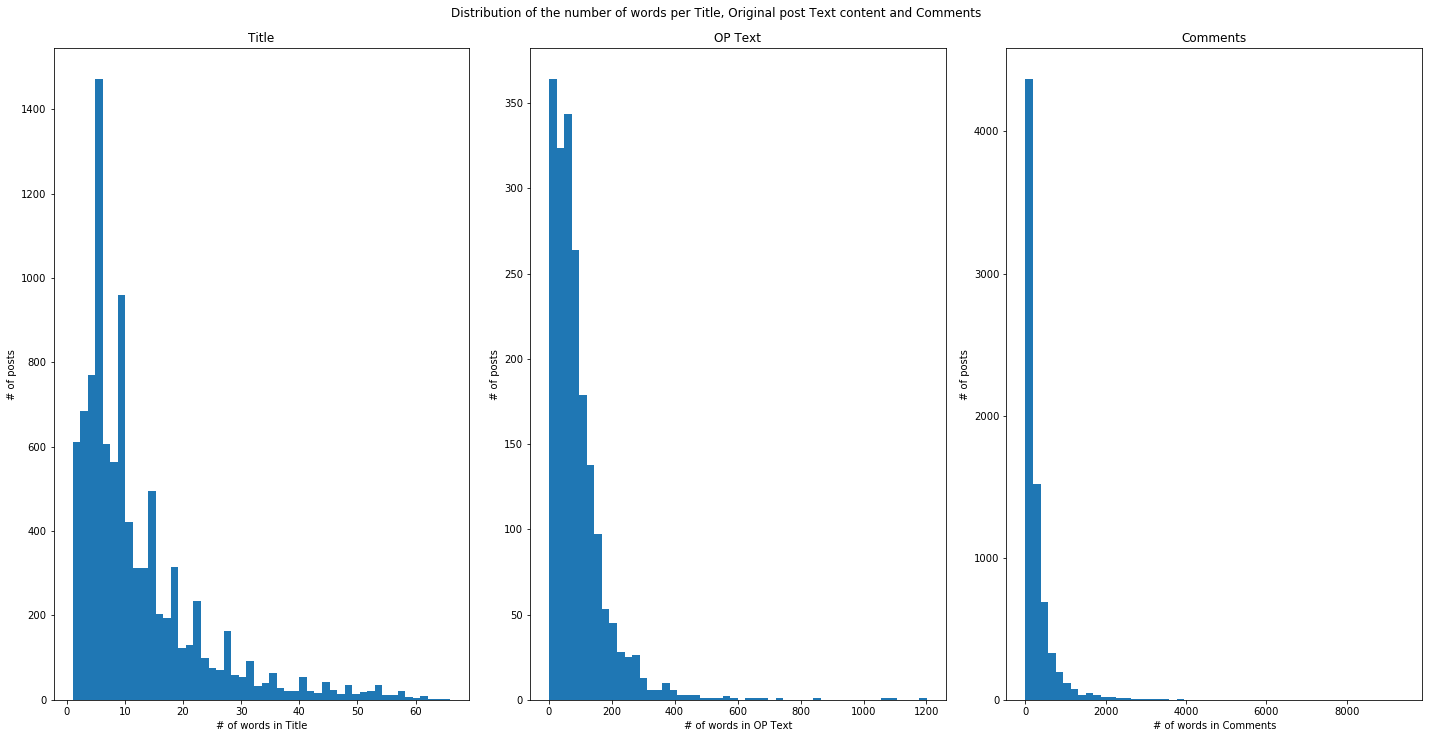

In [21]:
# Plotting distribution of number of words in Title, OP Text and Comments per posts 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, sharex = False, sharey = False,  figsize=(20,10))
fig.subplots_adjust(top=0.8)
ax1.hist(final_df['Title'].apply(lambda x: len(x.split())), bins = 50)



ax2.hist(final_df['OP Text'].dropna().apply(lambda x: len(x.split())), bins = 50)


ax3.hist(final_df['Body'].dropna().apply(lambda x: len(x.split())), bins = 50)


ax1.set_title("Title")
ax2.set_title("OP Text")
ax3.set_title("Comments")

ax1.set(xlabel = "# of words in Title", ylabel = "# of posts")
ax2.set(xlabel = "# of words in OP Text", ylabel = "# of posts")
ax3.set(xlabel = "# of words in Comments", ylabel = "# of posts")

plt.suptitle("Distribution of the number of words per Title, Original post Text content and Comments", y=1.02)

plt.tight_layout()
plt.show()

We can see that for all three text variables, the distribution of the number of words follows a Poisson distribution. In particular, the distribution of the number of words for all comments per posts is very skewed due to a few posts having a comments discussion amouting to more than 8000 words. 
We can see this more clearly on the table below: 

In [22]:
pd.DataFrame({"Title" : final_df['Title'].apply(lambda x: len(x.split())).describe(), 
              "OP Text" : final_df['OP Text'].dropna().apply(lambda x: len(x.split())).describe(), 
              "Comments" : final_df['Body'].dropna().apply(lambda x: len(x.split())).describe()
             })

,Title,OP Text,Comments
count,9591.000000,1951.000000,7502.000000
mean,12.121781,90.477704,279.116769
std,10.673717,95.710195,436.408757
min,1.000000,1.000000,1.000000
25%,5.000000,34.000000,52.000000
50%,9.000000,68.000000,143.000000
75%,15.000000,118.000000,330.000000
max,66.000000,1201.000000,9403.000000


We can see that Titles are in average 12 words longs, with a minimum of 1 word and a maximum of 66 words long and 75% of the posts being less than or equal to 15 words long. 
Only 1951 posts have additional text content in addition to titles, and these are in average 10 words long. The minimum is 1 word long, the maximum is 1201 words long and 75% of the posts with additional text content are less than or equal to 118 words long. 
Finally, 7502 posts have comments. the total comment disscussion per post is in average 279 words long. The minimum is 1, the maximum is 9403 and 75% of the comments disscusion per posts are less than or equal to 330 words long. 

We are now interested in the text content per se of these variables and to summarize their vocabulary. 
The vocabulary is the entirety of words that have been mentionned at least once in each of the three variables. In order to get a robust view of the vocablary, we will thus proceed with the preprocessig of the text data. This step consists in cleaning the strings and reduce noise by removing unwanted characters, group all versions of a word into one version (ex: foot and feet -> foot, have, having, had -> have).

Part of the cleaning was already handled when we extracted the data, as we made sure to remove emojis and foreign characters. 
For the remainder of the preprocessing, the detailed steps are as follow: 
* Punctuation and URL removal in order to keep only words
* Lowering case to standardise all text. 
* Removing Stop words; stop words are common general words that don't bring any value to the analysis 
* Tokenization: splitting the text in smaller units, usually words. 
* Stemming and Lemmatization: this step consists in transforming all words into their most base level form ( ex: baking -> bake), without losing their meaning. 

Below, we define a function performing the preprocessing of our data: 

In [23]:
import re
import string
import nltk
import spacy
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Valou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
STOPWORDS = set(stopwords.words('english') + ['nan'])
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
map_punc = " ". join(['']*(len(string.punctuation) +1))

def preprocess_text(s, token =True): 
    #lower case
    res = s.lower()
     # remove url 
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    res = url_pattern.sub(r' ', res)
    #remove \n 
    res = res.replace("\n", " ")
    #remove numbers
    res = re.sub('\d', ' ', res)
    
    if token:
        # removing punctuation: 
        res = res.translate(str.maketrans(string.punctuation,map_punc,))
        # lemmatization
        doc = nlp(res)
        res = " ". join([token.lemma_ for token in doc]).lower()
        #replace ' with space
        #res = res.replace("'", " ")
        # removing stopwords
        res = " ".join([word for word in str(res).split() if word not in STOPWORDS])
        #res = correct_spellings(res)


   
    return res
    


Here is an example of how a string is transformed after it is passed into our preprocessing function: 

In [25]:
s ="i.'m Really, really proud of the crumb on my latest sourdough\n.  Looks awesome, but leave it in the oven longer 350c 08:00! (I like a dark brown crust and I know that's subjective),My crust has been a little light lately and not as crusty as normal. Probably need to adjust the oven time a bit. Thanks for the tip!,Looks great!!!,Looks slightly like a bum, even a buttcrack,Uh... what kinda cracks you looking at friend? May want to get that checked out ,Huh? Oh i just noticed there is kind of a hole too,Looks really nice, this is my target but I cant seem to get it right... How many hours of fermentation does it have? Also its white flour right?,What a beaut!!!!! Amazing job!!,Looks great!!! Keep at it!!,For reference, I used the Intermediate Sourdough recipe from [Baking Bread for Beginners](https://smile.amazon.com/Bread-Baking-Beginners-Essential-No-Knead/dp/1641521198/ref=mp_s_a_1_1_sspa?dchild=1&amp;amp;keywords=bonnie+ohara+bread+baking+for+beginners&amp;amp;qid=1615818412&amp;amp;sprefix=bonnie+oh&amp;amp;sr=8-1-spons&amp;amp;psc=1&amp;amp;spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExMEZBNktDR0tKV1RLJmVuY3J5cHRlZElkPUEwMzU3NjE5MjFYWkpUNDQzR1kxVyZlbmNyeXB0ZWRBZElkPUExMDQ4NDQ2M1JaVDlXQTJFTTFKRyZ3aWRnZXROYW1lPXNwX3Bob25lX3NlYXJjaF9hdGYmYWN0aW9uPWNsaWNrUmVkaXJlY3QmZG9Ob3RMb2dDbGljaz10cnVl)\n\nIts 850g of white bread flour and 150g of whole wheat flour (and my starter actually uses rye as well). Fermentation is actually only 5 hours in a warm place, which seems weird but works. Highly recommend getting the book I linked, literally my bible. \n\nHope this helps!,Thank you a lot, that recipe is really similar to mine, and my starter also has rye, so that motivates me a lot :)"
preprocess_text(s)

'really really proud crumb late sourdough look awesome leave oven long c like dark brown crust know subjective crust little light lately crusty normal probably need adjust oven time bit thank tip look great look slightly like bum even buttcrack uh kinda crack look friend may want get check huh oh notice kind hole look really nice target seem get right many hour fermentation also white flour right beaut amazing job look great keep reference use intermediate sourdough recipe bake bread beginner g white bread flour g whole wheat flour starter actually use rye well fermentation actually hour warm place seem weird work highly recommend get book link literally bible hope help thank lot recipe really similar mine starter also rye motivate lot'

In [26]:
print("Original sentence lenght: " , len(s.split()) , " words")
print("After preprocessing lenght: " , len(preprocess_text(s).split()) , " words")

Original sentence lenght:  212  words
After preprocessing lenght:  123  words


We can see that all text is now lower case, the numbers, punctuations, urls and stop words have been removed and all words have been lemmatized. 
From a length of 212, we have reduced the length of the sentence to 123. 

We are now confident to use the function on the Titles, OP Text and comments. 

In [27]:
%%time 
final_df['standard_title'] = final_df['Title'].apply(lambda x: preprocess_text(x))
final_df['standard_op'] = final_df['OP Text'].fillna('').apply(lambda x: preprocess_text(x))
final_df['standard_body'] = final_df['Body'].fillna('').apply(preprocess_text)
final_df.head()

Wall time: 2min 45s


,Post ID_x,Subreddit,Title,OP Text,Permalink,Publish Date,Flair,Post ID_y,Body,Post ID2,standard_title,standard_op,standard_body
0,jw2x62,Sourdough,Feeling the flair????,[deleted],/r/Sourdough/comments/jw2x62/feeling_the_flair/,2020-11-17 23:17:41,Post flairs are now active,t3_jw2x62,Flairs are active on posts now should you wish...,jw2x62,feel flair,delete,flair active post wish use
1,jw32v5,Sourdough,Is this water? It smells like alcohol,[deleted],/r/Sourdough/comments/jw32v5/is_this_water_it_...,2020-11-17 23:25:56,Newbie help,t3_jw32v5,Hooch (water+alcohol+various other acids),jw32v5,water smell like alcohol,delete,hooch water alcohol various acid
2,jw36fb,Sourdough,"Practicing and practicing, getting better. Fin...",NaN,/r/Sourdough/comments/jw36fb/practicing_and_pr...,2020-11-17 23:31:02,Rate/critique my bread,NaN,NaN,NaN,practice practice get well finally get taste s...,,
3,jw3m6g,Sourdough,This sub helped me bake my first decent whole ...,NaN,/r/Sourdough/comments/jw3m6g/this_sub_helped_m...,2020-11-17 23:54:25,Crumbshot,t3_jw3m6g,Well done that's pretty beautiful \n\nHow does...,jw3m6g,sub help bake first decent whole wheat sourdou...,,well pretty beautiful taste daaaamn nice loaf ...
4,jw3vhi,Sourdough,Starter,New to the sourdough game. Ive been babying a ...,/r/Sourdough/comments/jw3vhi/starter/,2020-11-18 00:08:11,Everything help,t3_jw3vhi,"If you've been at it for a couple of weeks, yo...",jw3vhi,starter,new sourdough game baby starter last couple we...,couple week starter reliably double size feedi...


The 100 most common words in the Titles are displayed in the wordcloud below: 

In [28]:
# Import package
from wordcloud import WordCloud

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

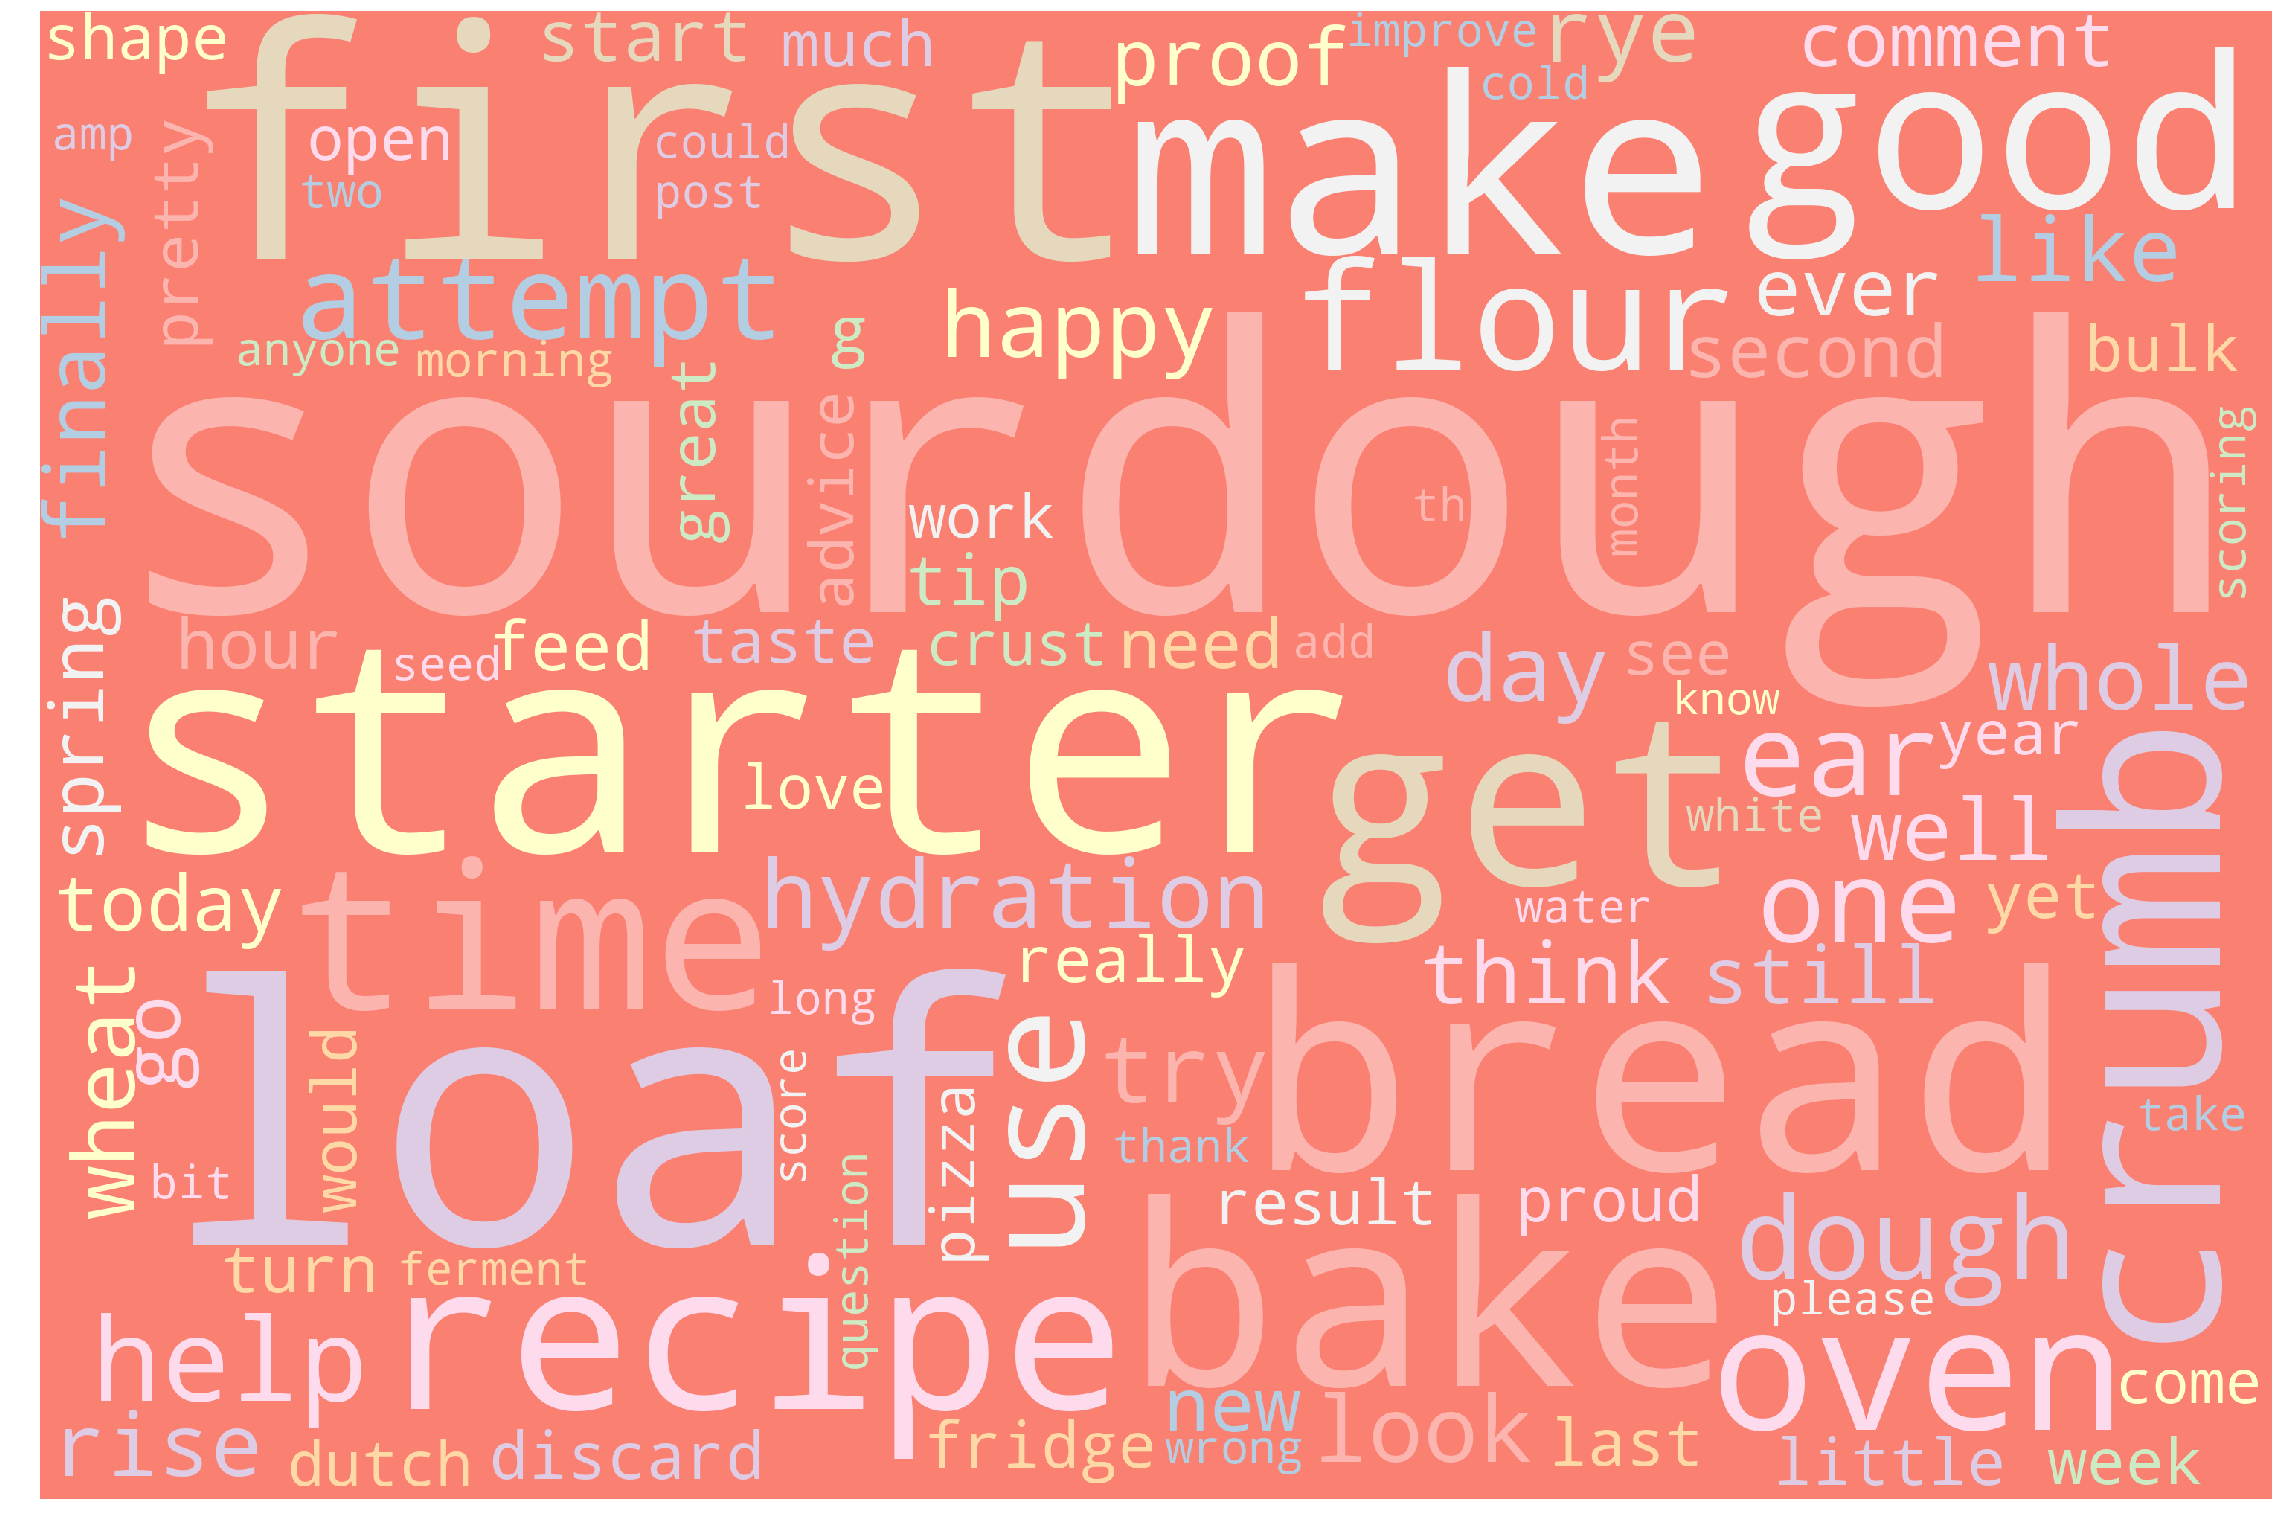

In [30]:
all_titles = ' '.join(np.hstack(final_df['standard_title'].values))
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, max_words = 100, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_titles)
# Plot
plot_cloud(wordcloud)

Among the most frequent words, we can find: Sourdough, loaf, first, starter, bread. 

For OP Text, the 100 most common words are: 

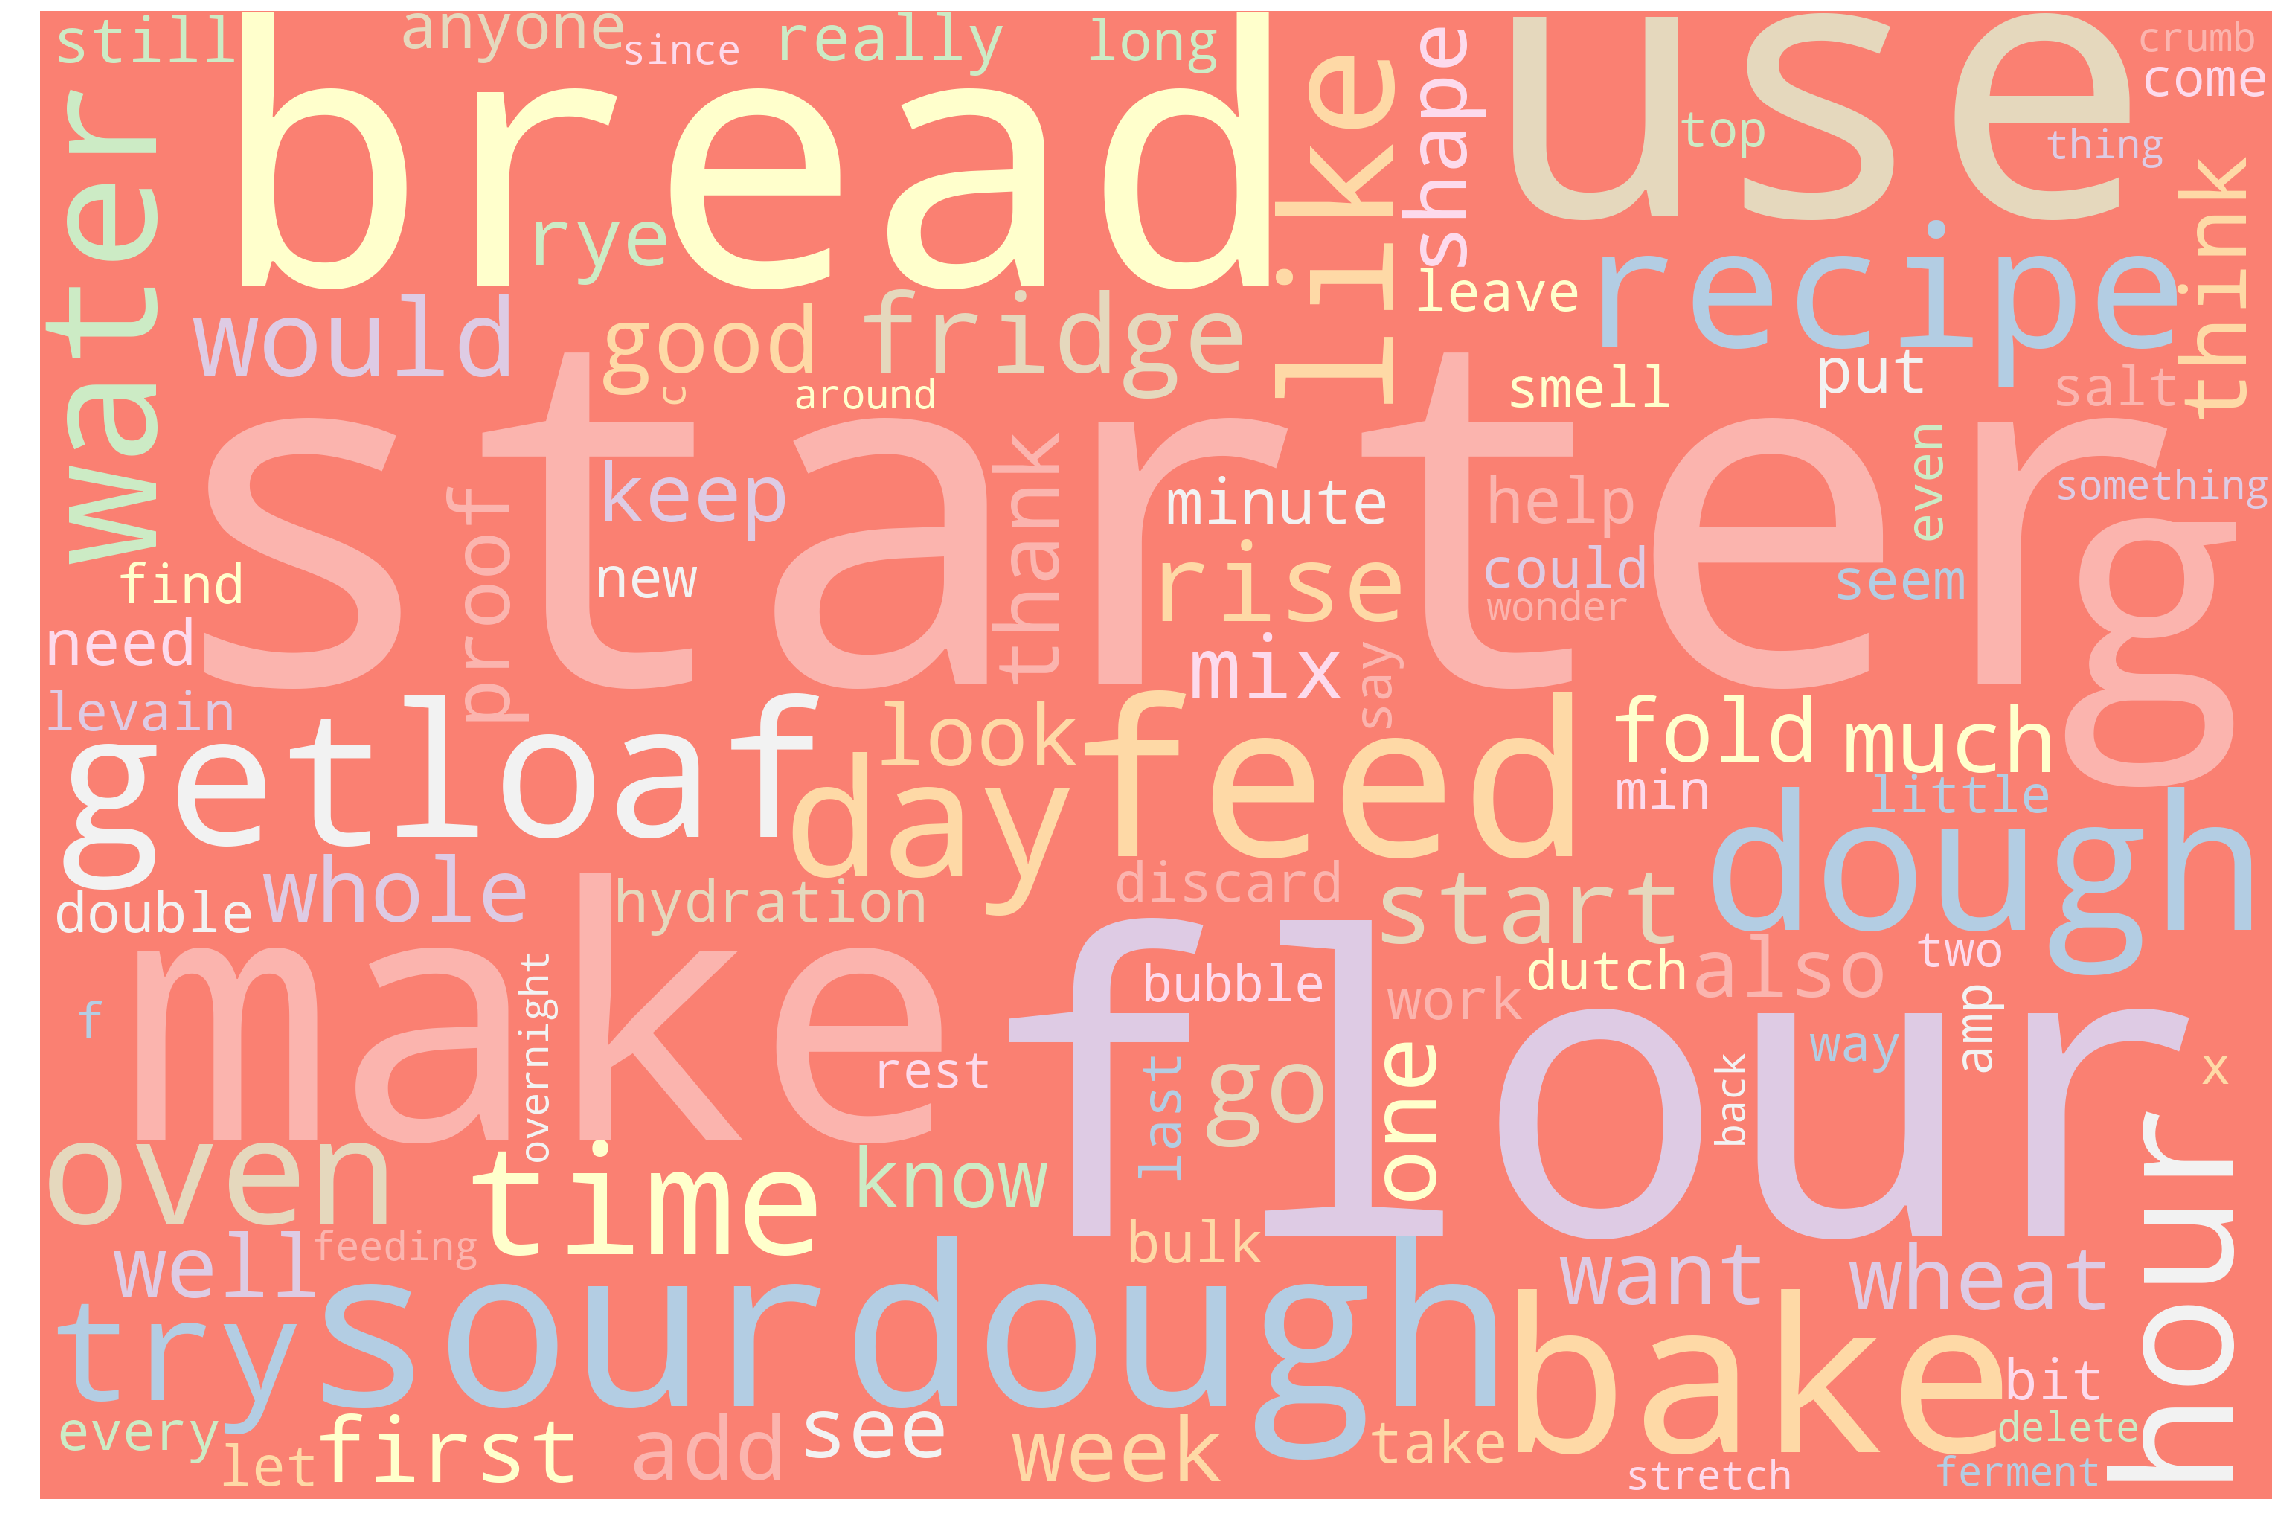

In [31]:
all_op = ' '.join(np.hstack(final_df['standard_op'].values))
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, max_words = 100, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_op)
# Plot
plot_cloud(wordcloud)

Among them, the most frequents are: Starter, flour, use, bread, make. 
However, in comparison to the wordcloud produced with Titles, we can see that among the 100 most frequent words, a lot of them are related to the process of bread baking. For example: rise, shape, feed, recipe, etc. 

Finally, the most frequents words in the comments are displayed below: 

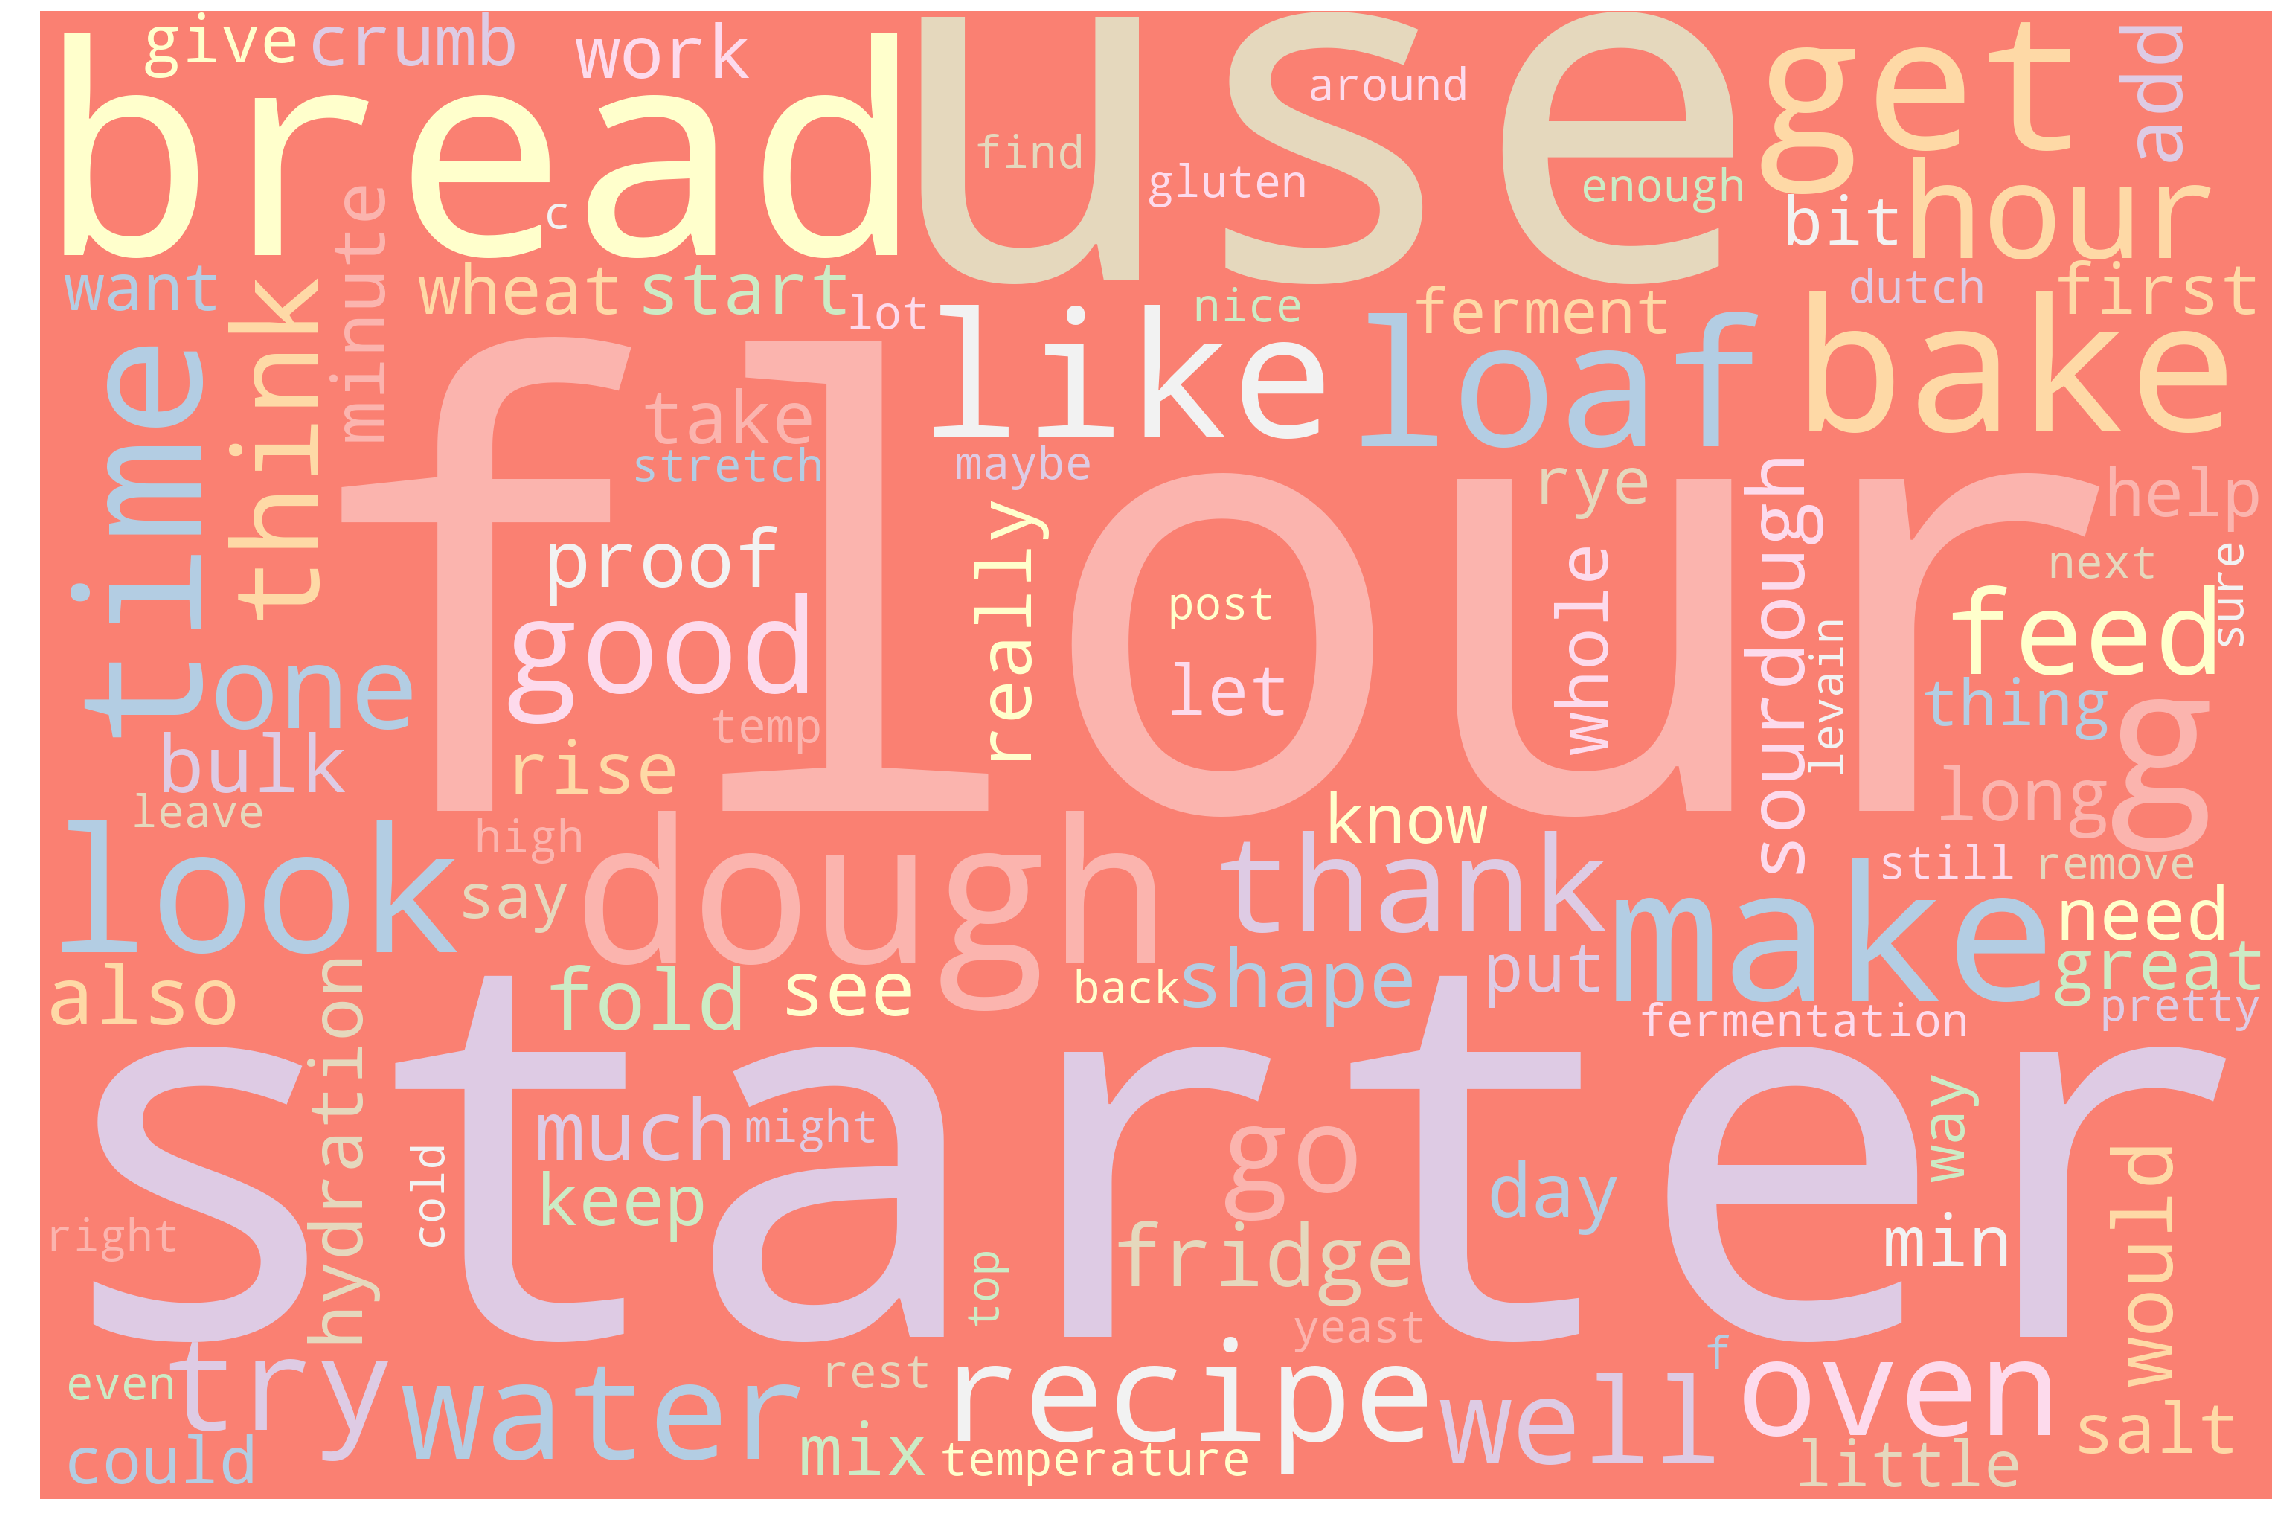

In [32]:
all_comms = ' '.join(np.hstack(final_df['standard_body'].values))
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, max_words = 100, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_comms)
# Plot
plot_cloud(wordcloud)

Among them, the most frequent words are: flour, use, starter, bread, dough. 
The 20 most common for all three can be compared in the table below: 

In [33]:
#Prepare counters for all three variables
title_vocab = Counter()
op_vocab = Counter()
comments_vocab = Counter()

#count uniaue words for all variables

final_df["standard_title"].str.lower().str.split().apply(title_vocab.update)
final_df['standard_op'].str.lower().str.split().apply(op_vocab.update)
final_df["standard_body"].str.lower().str.split().apply(comments_vocab.update)

# print length of vocabulary in all three variables
print(len(title_vocab.keys()), " unique words in title")
print(len(op_vocab.keys()), " unique words in additional text content in post")
print(len(comments_vocab.keys()), " unique words in comments")

5205  unique words in title
5379  unique words in additional text content in post
19878  unique words in comments


In [34]:
# display table with 20 most frequent words in all three variables 

pd.DataFrame({"Title" : title_vocab.most_common(20), 
              "OP Text" : op_vocab.most_common(20),
              "Comments" : comments_vocab.most_common(20)
             })

,Title,OP Text,Comments
0,"(sourdough, 2458)","(starter, 2032)","(flour, 15572)"
1,"(loaf, 1984)","(flour, 1425)","(starter, 15380)"
2,"(first, 1577)","(use, 1131)","(use, 13082)"
3,"(starter, 1356)","(bread, 1123)","(bread, 11942)"
4,"(bread, 1125)","(make, 1062)","(dough, 11766)"
5,"(bake, 959)","(g, 1000)","(g, 11105)"
6,"(make, 912)","(sourdough, 987)","(make, 10335)"
7,"(get, 871)","(feed, 925)","(get, 10226)"
8,"(crumb, 685)","(bake, 907)","(bake, 9969)"
9,"(good, 673)","(dough, 884)","(like, 8933)"


If we compare all three wordclouds, we can see that for titles, the most used words are: Sourdough, first, loaf, starter, bread. 

In OP Text, they are: Starter, flour, bread, use, make and g ( the abbrevation for the weight unit  grams). 
In the comments, they are: Starter, flour, use, bread, dough, and g. 
In general, in the OP text text and comments, verbs are more used than in the title, showing that these parts are usually used to discuss steps in the bread making process. 

Finally, we create the final feature that will be used to build our classifier: We concatenate Title, OP Text and comments together, both for the original sentences, and for the bag of words versions of the variables, are both will be used later in the project. 

In [35]:
final_df['standard_text'] = final_df[['standard_title', 'standard_op','standard_body']].fillna('').agg(' '.join, axis=1)
final_df['Text'] = final_df[['Title','OP Text','Body']].fillna('').agg(' '.join, axis=1)
final_df.head()

,Post ID_x,Subreddit,Title,OP Text,Permalink,Publish Date,Flair,Post ID_y,Body,Post ID2,standard_title,standard_op,standard_body,standard_text,Text
0,jw2x62,Sourdough,Feeling the flair????,[deleted],/r/Sourdough/comments/jw2x62/feeling_the_flair/,2020-11-17 23:17:41,Post flairs are now active,t3_jw2x62,Flairs are active on posts now should you wish...,jw2x62,feel flair,delete,flair active post wish use,feel flair delete flair active post wish use,Feeling the flair???? [deleted] Flairs are act...
1,jw32v5,Sourdough,Is this water? It smells like alcohol,[deleted],/r/Sourdough/comments/jw32v5/is_this_water_it_...,2020-11-17 23:25:56,Newbie help,t3_jw32v5,Hooch (water+alcohol+various other acids),jw32v5,water smell like alcohol,delete,hooch water alcohol various acid,water smell like alcohol delete hooch water al...,Is this water? It smells like alcohol [deleted...
2,jw36fb,Sourdough,"Practicing and practicing, getting better. Fin...",NaN,/r/Sourdough/comments/jw36fb/practicing_and_pr...,2020-11-17 23:31:02,Rate/critique my bread,NaN,NaN,NaN,practice practice get well finally get taste s...,,,practice practice get well finally get taste s...,"Practicing and practicing, getting better. Fin..."
3,jw3m6g,Sourdough,This sub helped me bake my first decent whole ...,NaN,/r/Sourdough/comments/jw3m6g/this_sub_helped_m...,2020-11-17 23:54:25,Crumbshot,t3_jw3m6g,Well done that's pretty beautiful \n\nHow does...,jw3m6g,sub help bake first decent whole wheat sourdou...,,well pretty beautiful taste daaaamn nice loaf ...,sub help bake first decent whole wheat sourdou...,This sub helped me bake my first decent whole ...
4,jw3vhi,Sourdough,Starter,New to the sourdough game. Ive been babying a ...,/r/Sourdough/comments/jw3vhi/starter/,2020-11-18 00:08:11,Everything help,t3_jw3vhi,"If you've been at it for a couple of weeks, yo...",jw3vhi,starter,new sourdough game baby starter last couple we...,couple week starter reliably double size feedi...,starter new sourdough game baby starter last c...,Starter New to the sourdough game. Ive been ba...


The final number of unique words in standard_text, which represents the bag of word version of the concatenation of Title, OP text and comments per post is displayed below:


In [36]:
#Prepare counters for standard_text
all_text_vocab = Counter()

#count uniaue words

final_df["standard_text"].str.lower().str.split().apply(all_text_vocab.update)

# print length of vocabulary
print(len(all_text_vocab.keys()), " unique words in all text content")
print(len(Counter({k: c for k, c in all_text_vocab.items() if c <= 1})), " words used only once")

21066  unique words in all text content
9391  words used only once


we have 21066 unique words, and among them 9391 are only used once (almost 45 %). While these unique words could really be words that are only mentionned once, it is more likely that come of them are actually words with typos. A few of these words are displayed below: 

In [37]:
list(Counter({k: c for k, c in all_text_vocab.items() if c <= 1}).keys())[:20]

['daaaamn',
 'commensurate',
 'reaally',
 'lifeprotip',
 'cambazola',
 'endive',
 'roquefort',
 'canep',
 'yups',
 'stepbrother',
 'pimento',
 'karate',
 'workstation',
 'repartee',
 'emmental',
 'contraversial',
 'ethical',
 'jackass',
 'unpunished',
 'annnnnd']

For example, controversial is misspelled as contraversial. 

As a last step for the preprocessing, we will tr and apply some correction to the list of these 9391 words, in order to reduce the number of unique words in the vocabulary. 
We will select only the records where these words appear, in order to save time execution time. 

In [38]:
# selecting, words with only 1 occurence in the vocabulary
kwstr = " | ".join(list(Counter({k: c for k, c in all_text_vocab.items() if c <= 1}).keys()))

In [39]:
# displaying a subset of the sords selected to try to apply the speller correcter 
kwstr[:100]

'daaaamn | commensurate | reaally | lifeprotip | cambazola | endive | roquefort | canep | yups | step'

In [40]:
%%time
#select the records
record_to_correct = final_df["standard_text"].str.contains(kwstr)

Wall time: 53.1 s


In [41]:
print(sum(record_to_correct), " records with unique words to spell check")

3446  records with unique words to spell check


In [42]:
# split records that need further investigation for correction
spell_df = final_df.loc[record_to_correct, :].copy()
spell_df.shape

(3446, 15)

The function doing the spelling correction is based on the SpellChecker() function from the spellchecker library. 
Two methods are used: the first one, spell.unknown(), checks if the words it encounters exist in a dictionnary which can be preloaded or custom. The second one, spell.correction() returns the most likely replacement, which is to say, the first word that is less than 2 edits away from the unknown word.

After replacing the corrected words, we go through the words a last time to remove any words which could have been corrected to a StopWord. 

The function is defined below: 

In [43]:
spell = SpellChecker()

def correct_spellings(text, token=True):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
            
    res = " ".join(corrected_text)
    
    #remove stopwords if the corrected words are stopwords.
    if token:
        res = " ".join([word for word in str(res).split() if word not in STOPWORDS])
    return res
    
   

In [44]:
%%time
spell_df["standard_text_spell"] = spell_df["standard_text"].apply(correct_spellings)

Wall time: 42min 7s


In [45]:
all_text_vocab_spellcheck = Counter()
spell_df['standard_text_spell'].str.split().apply(all_text_vocab_spellcheck.update)

print(len(all_text_vocab_spellcheck.keys()), " unique words in all available text content")

print(len(Counter({k: c for k, c in all_text_vocab_spellcheck.items() if c <= 1})), " words used only once")

17654  unique words in all available text content
7587  words used only once


In [46]:
final_df.loc[record_to_correct, "standard_text"] = spell_df["standard_text_spell"] 

In [47]:
%%time
all_text_vocab = Counter()
final_df['standard_text'].str.split().apply(all_text_vocab.update)

print(len(all_text_vocab.keys()), " unique words in all available text content")
print(all_text_vocab.most_common(20))
print(len(Counter({k: c for k, c in all_text_vocab.items() if c <= 1})), " words used only once")

18720  unique words in all available text content
[('starter', 18772), ('flour', 17579), ('use', 14708), ('bread', 14195), ('dough', 13089), ('make', 12317), ('get', 11967), ('bake', 11836), ('loaf', 11651), ('time', 9982), ('like', 9972), ('recipe', 9808), ('look', 9616), ('oven', 9327), ('water', 9125), ('hour', 8832), ('good', 8680), ('sourdough', 8480), ('try', 8425), ('thank', 8019)]
7271  words used only once
Wall time: 261 ms


We now only have 18720 unique words in the vocabulary, with 7271 appearing only once. 

We can now focus on our target variable:  the flairs. 

#### 3.2) Target variable: Flair

Let's now focus on Flair. 



In [48]:
print('Flair contains {} unique categories.'.format(len(sdf_eda['Flair'].unique())))

Flair contains 40 unique categories.


The different categories are displayed below: 

In [49]:
sdf_eda['Flair'].value_counts()

Look!                                1071
Newbie help                           802
Sourdough                             670
Starter help                          643
Help                                  600
 Rate/critique my bread               561
Crumbshot                             559
I'm just here to brag                 438
Rate/critique my bread                382
Let's discuss/share knowledge         328
Beginner - checking how I'm doing     303
Ear ear                               261
Crumbshot                             261
Crumb help                            260
Beginner - wanting kind feedback      247
Things to try                         225
My perfect loaf                       212
Let's talk technique                  202
I MUST share this recipe              200
Recipe help                           190
Everything help                       172
Let's discuss                         146
Silly/amusing bread                   100
Let's talk about flour            

We have 40 different categories, some of which have very few observations. This imbalance in categories will cause issues for our classification problem, as classes with less observations will be less well predicted. 
In order to correct for this, one of the options is to regroup the categories in a fewer amount of super categories. 

Our first step for this will be to first check the use of the flairs over time, in order to determine if all Flairs are always used at the same time, or if some might have been discontinued and replaced by others. 

In [50]:
# create summary per days for all flairs 
final_df['Publish Date Datetime'] = pd.to_datetime(final_df['Publish Date'])
final_df['day'] = final_df['Publish Date Datetime'].dt.date

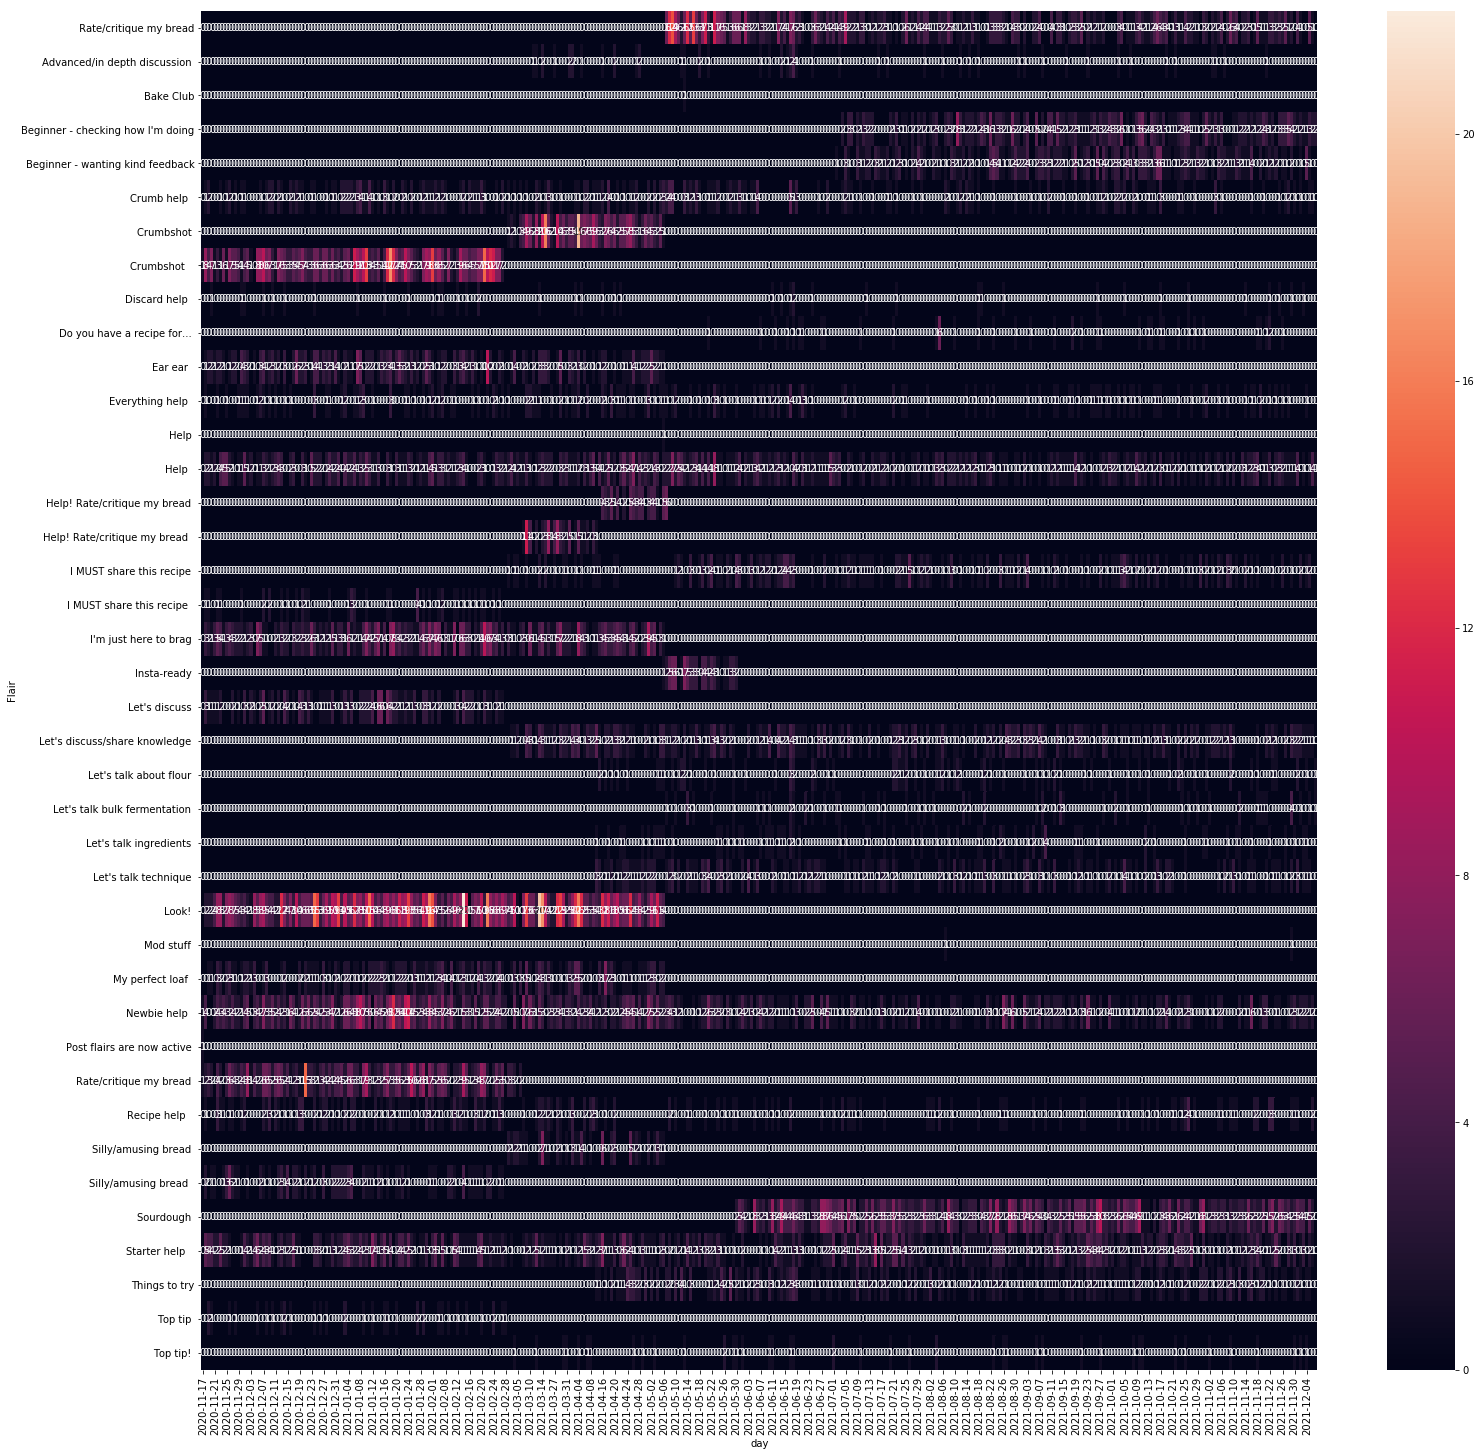

In [51]:
days_flairs = pd.crosstab(index = final_df['Flair'], columns = final_df['day'])
plt.figure(figsize=(25,25))
sns.heatmap(days_flairs, annot=True)

We can see that we have some duplicated Flairs, that are only different due to punctuation differences (ex: 'Top tip'/'Top tip!') and that don't actually overlap in time. In these cases, it is clear that these categories should be grouped together. 

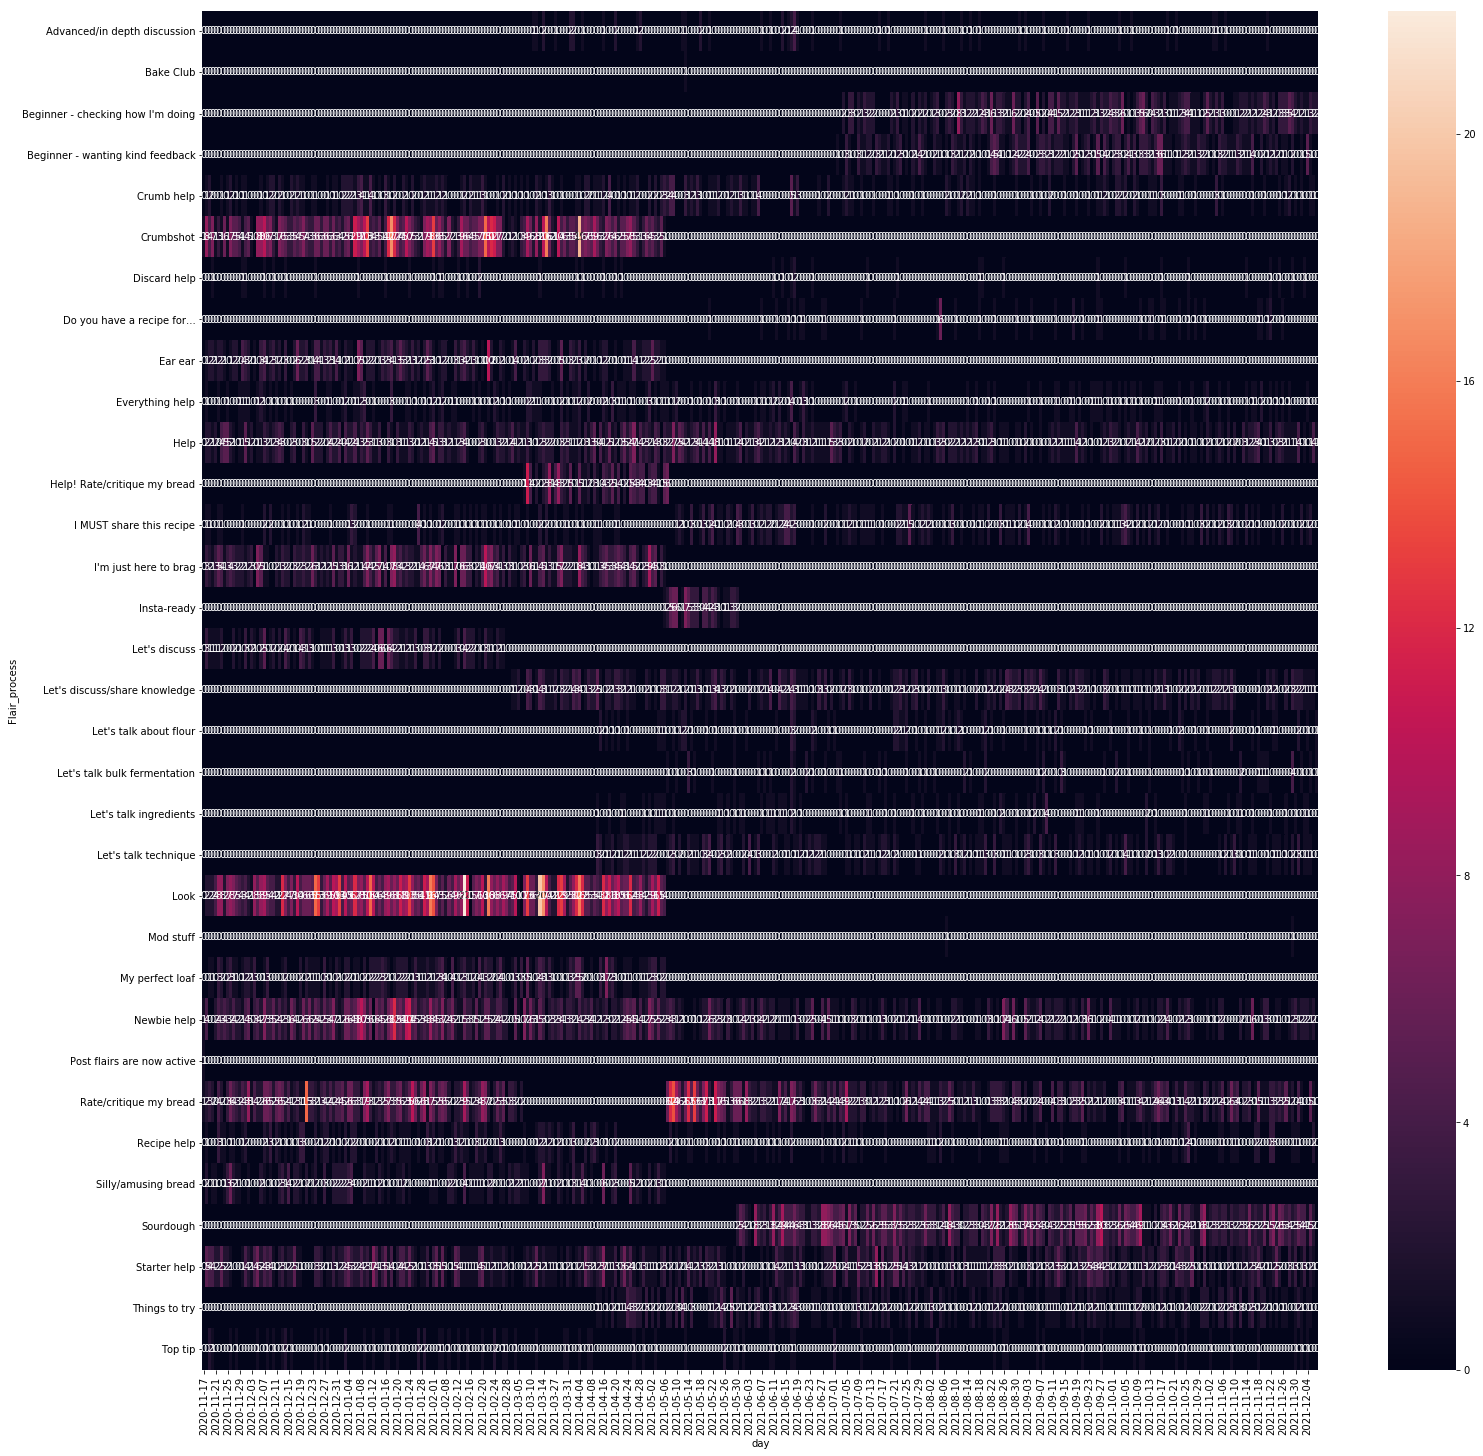

In [52]:
final_df['Flair_process'] = [x.strip('! ') for x in final_df['Flair']]
days_flairs = pd.crosstab(index = final_df['Flair_process'], columns = final_df['day'])
plt.figure(figsize=(25,25))
sns.heatmap(days_flairs, annot=True)

We can see that all Flairs are not used during the whole period of time. Some are only used at the begining of the period, while others are used only at the end, with no overlap with the previous ones. Finally, some are used throughout the period. 
Among those that don't overlap, we can see that their meaning are very close. For example, 'Rate/critique my bread' and 'Help! Rate/Critique my bread' aere used on non overlaping periods of time, and have very similar meanings. It seems thus reasonnable to group these two flairs together. The same goes with "Let's discuss" and "Let's discuss/share knowledge". 

Finally, based on our knowledge of the sourdough subreddit, we can identify 4 main types of Flair categories: 
* "Look": composed of all posts where the objective is simply to show the result of a bake, with categories such as Look!, Insta-ready, Crumbshot, Ear ear, etc. 
* "Critique": composed of posts where people show the results of their breads, but with the explicit goal of getting feedback. 
* "Help": where people have a specific question or a difficulty they want to help with
* "Discussion": for posts where people want to exchange on specific topics. 

The mapping between the original Flairs and the reconciled flairs are displayed on the table below: 

|Critique | Look | Help | Discussion|
| :-: | :-: | :-: | :-: |
| Rate / Critique my bread | Look | Help | Let's discuss/share knowledge |
| Beginner / Checking how I'm doing | Crumbshot | Newbie Help | Sourdough |
| Beginner/ Wanting kind feedback | Insta-ready  | Starter help | I must share this recipe |
|  | Ear ear | Crumb help | Things to try |
|  | My perfect loaf | Recipe help | Let's discuss technique |
|  | Silly / amusing bread | Discard help | Let's discuss flour |
|  | I'm just here to brag| Do you have a recipe for | Top tip |
|  | | | Let's discuss ingredients |
|  | | | Let's discuss bulk fermentation |
|  | | | Mod stuff |
|  | | | Post flairs are now active |
|  | | | Advanced in depth discussion |
|  | | | Bake club |

Thus, in the end, the proportions of flairs in each reconciled flairs are: 

In [53]:
# Grouping; 

dict_grp_flair = {"Help! Rate/critique my bread" :  "Critique", 
                  "Rate/critique my bread" :  "Critique", 
                  "Beginner - checking how I'm doing" :  "Critique",
                  "Beginner - wanting kind feedback" :  "Critique",
                  "Let's discuss": "Discussion",
                  "Let's discuss/share knowledge": "Discussion",
                  "Advanced/in depth discussion": "Discussion",
                  "Mod stuff": "Discussion",
                  "Post flairs are now active": "Discussion",
                  "Sourdough": "Discussion",
                  "I MUST share this recipe": "Discussion",
                  "Things to try": "Discussion",
                  "Let's talk technique": "Discussion",
                  "Let's talk about flour": "Discussion",
                  "Top tip": "Discussion",
                  "Let's talk ingredients": "Discussion",
                  "Let's talk bulk fermentation": "Discussion",
                  "Bake Club": "Discussion",
                  "I'm just here to brag": "Look", 
                  "Crumbshot": "Look",
                  "Insta-ready": "Look",
                  "Ear ear": "Look",
                  "My perfect loaf": "Look",
                  "Silly/amusing bread": "Look",
                  "Everything help": "Help",
                  "Newbie help": "Help",
                  "Starter help": "Help",
                  "Crumb help": "Help",
                  "Discard help": "Help",
                  "Recipe help": "Help",
                  "Do you have a recipe for...": "Help", 
                  
                 }
final_df.Flair_process.replace(dict_grp_flair, inplace = True)

In [54]:
final_df.Flair_process.value_counts(normalize = True).apply(lambda x: round(x *100,2))

Look          31.65
Help          28.72
Discussion    22.67
Critique      16.95
Name: Flair_process, dtype: float64

We can see that while, the new reconciled Flairs are still unbalanced, the difference in proportions are not as drastic as before, and using methods deal with this imbalance, should yield better results.  

The following figure shows summaries the new reconciled Flairs over time: 

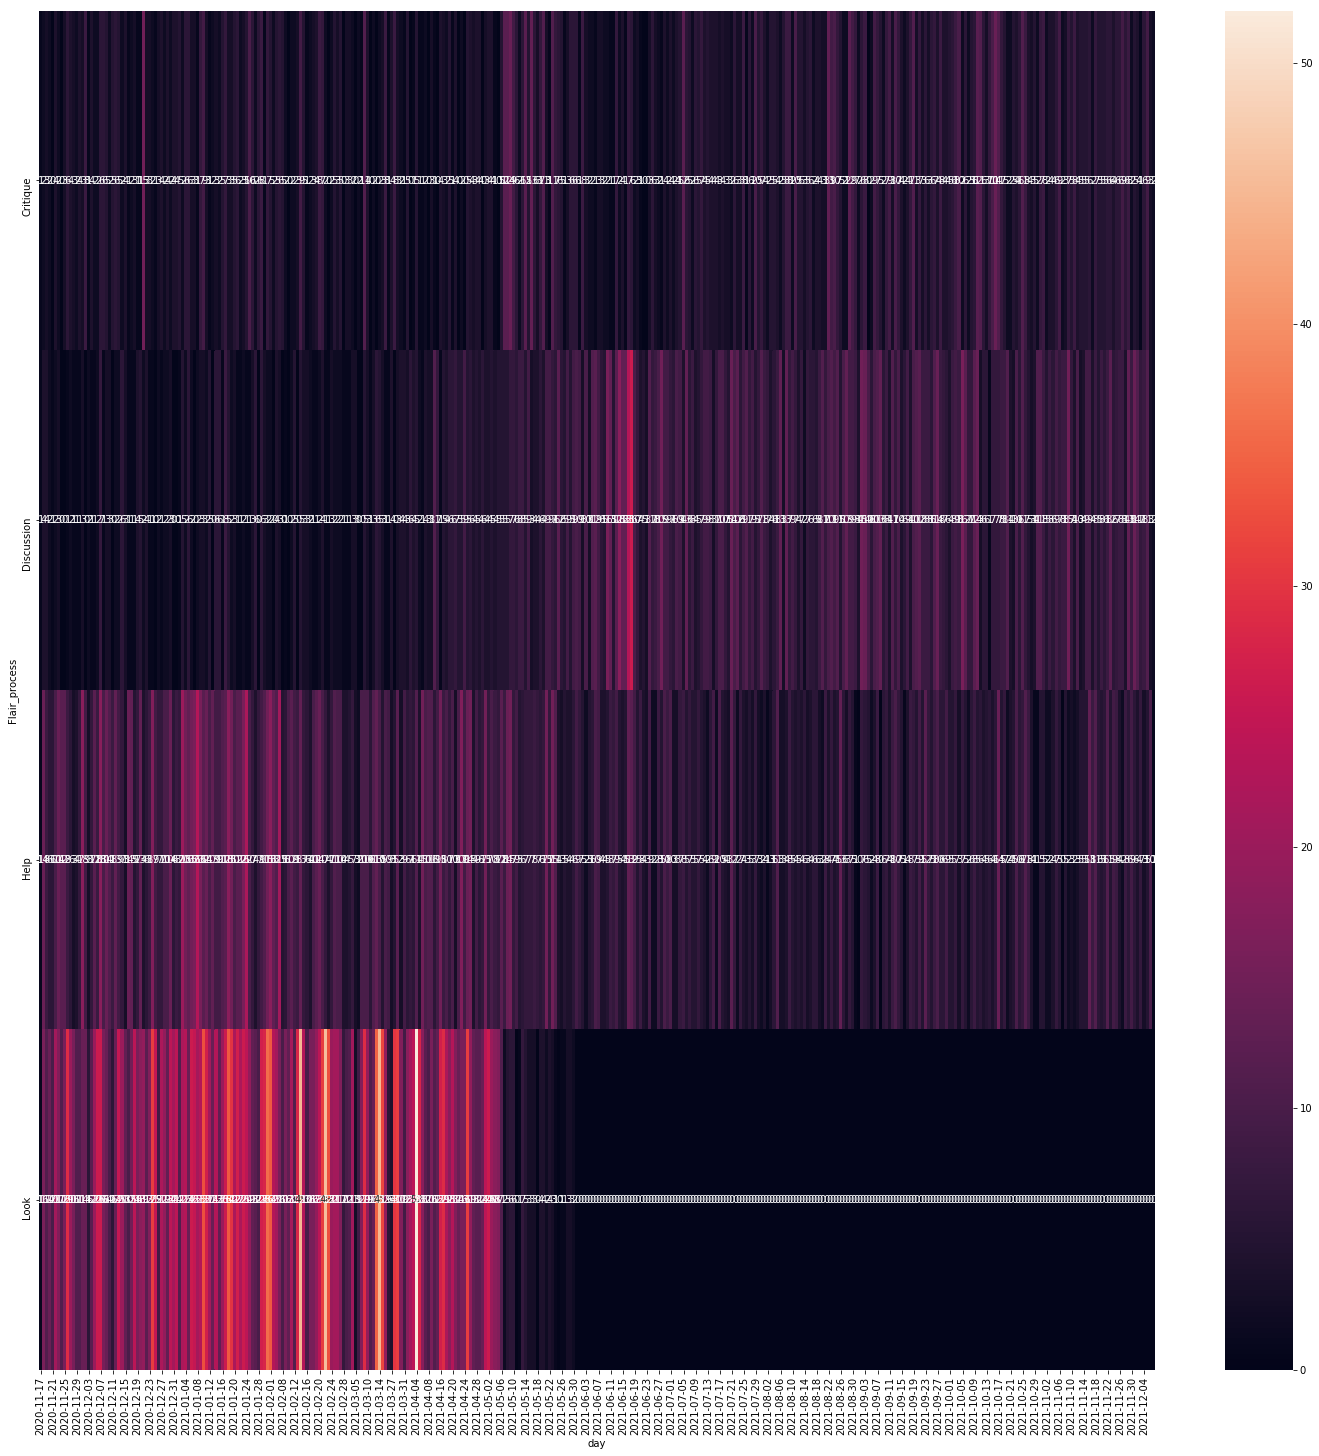

In [55]:
days_flairs = pd.crosstab(index = final_df['Flair_process'], columns = final_df['day'])
plt.figure(figsize=(25,25))
sns.heatmap(days_flairs, annot=True)

Except for the "Look" Flair, all the other Flairs are uniformely used during the whole period of time. 

## 4) Feature embedding

The final step for this notebook is to perform the final embedding of our main feature of interest: text_standard. As we know, machine learning models cannot process non numeric data. Thus, text data and images need to be embedded numerically before they can be feed to any model. 

### 4.1) Embedding methods 
#### Bag of words techniques
In the case of text data, the simplest strategy is a method called: Bag of words. In this case, the sentences are broken up in smaller units called tokens (usually words), then each unique token is collected and is numerically represented by the number of time it appears in a particular records. A more 
After transformation of the data, we thus obtain a matrix with n rows and m columns, where: 
* n is the number of records in the dataset (here, the number of reddit posts).
* m is the number of tokens in the vocabulary (here, as established earlier in this notebook, 18720 unique tokens). 
Naturally, as the number of tokens is extremelly large and and all are not present in all records, the resulting matrix is what is a called a sparse matrix: a matrix where most of the elements are equal to 0. 

The main advantages for this technique are: 
* It is very simple to implement. 
* Interpretation is easy, as each feature is a word, and we can clearly identify which tokens are the most important in the final classifier. 

However, the technique also has its drawbacks: 
* When sentences are represented with bag of words, we lose the context in which each words are used.
* A lot of noise is present in the data, due to words that are either ubiquitous or very rare. Indeed, in the former case, words that are present in all records, don't allow us to discriminate between classes. In the later case, words don't appear frequently enough to provide any information.  

While, the first drawback might not be a problem in our case (after all, the topics that are discussed might be more important to us than how they are discussed), the second one can be adressed by using a more refined methods than a simple bag of words: the TF-IDF (Term Frequency times Inverse Document Frequency). This specific method ponders the words frequencies according to their frequency in the whole dataset, and can be tuned to filter the vocabulary and only keep tokens that neither too freqent, nor too rare. 
This is the one we will choose for the majority of this project. 

#### Context-sensitive techniques
A second strategy is to use embedding techniques that conserves informations about the context in which the words are used in sentences. An example of this is the word2vec family of approaches. Word2Vec models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. After training on a very large corpus of text, they represent each word with a vector, minimising the distance between vectors representing words that share the same semantic context. 

Another example of context conservative techniques are the use of models part of the BERT (Bidirectional Encoding Representations for Transformer) family. BERT models have  become a gold standard for the treatment of Natural Language Processing tasks, such as text classification.

BERT-family models are a type of networks called Transformers. Transformers are designed to handle sequential input data (data, where the order of the elements of the input is important, such as words in a sentence), by processing them not necessarily in order, with the use of attention mechanisms. 
In short, attention is a technique that mimics cognitive attention, and lets the model put more emphasis on a part of the data, while diminishing the effects of other parts, allowing the model to devote more focus to that small but important part of the data. The main goal of the neural network is thus to learn which part of the data is important. Processing sequential data out of order allows transformers like BERT to prallelize the processing, and thus work with datasets extremely large. 
The resulting output of an embedding with BERT is a set of high level features, that are not direclty transposable to the vocabulary of our corpus.

The main advantages of BERT are: 
* It is a state of the art model, which has been set as a state of the art techniaue since its first introduction, and new variation on the methods are constently improving performances on benchmark NLP tasks. 

Its drawbacks however, are as follow: 
* The high level features are not easily interpretable, as they are not directly correlated to the words present in the vocabulary
* It is not understood why BERT works as well as it does
* Training a BERT model from scratch needs a very large corpus of text and is very computationally expensive


The third piont can be mitigated, using a transfer learning approach. Indeed, Tensorflow has several pretrained models available on their hub, each providing either slightly different architectures, different number of high level features, or models that were pretrained on different types of corpus (Wikipedia vs Pubmed for example). Once, a pretrained model selected, it is then possible to fine-tune the model on our data and specific classification task, which is less computationally expensive than training the model from scratch. However, we have to keep in mind that if the text is very specialized and thus different from the one on which the pretraining was performed, BERT might not perform better than a more simple approach. 

For this reason, as well as the 2 other drawbacks mentionned earlier, we have decided to only implement the Bag-of-words approach with the TF-IDF ponderation, as this approach is 
* simple to implement (no blackbox effect) 
* simple to interpret
* might be a better option on specialized text. 


### 4.2) Embedding standard_text

Before prodeeding with the final embedding of our main feature: standard_text, we will now split our dataset into a train set and a test set. All further processing and exploration will only be performed on the train set. 

In [56]:
from sklearn.model_selection import train_test_split
y = final_df['Flair_process'].values
x = final_df.copy()


train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state = 0, stratify = y)
print("Train set: {} observations".format(train_x.shape[0]))
print("Test set: {} observations".format(test_x.shape[0]))

Train set: 6713 observations
Test set: 2878 observations


As mentionned, we will use the TF-IDF method to convert the cleaned, standardized and tokenized sentences into numeric vectors. 

To remove the noise from our data, we will tune the following parameters of a TF-IDF vectorizer: 
* max_df': ignore terms that have a document frequency strictly higher than the given threshold. This is the equivalent of setting up corpus-specific stop words. 
* min_df':  ignore terms that have a document frequency strictly lower than the given threshold. This also participates in setting up the corpus specific stop words. 
* use-idf: whether we actually enable the inverse-document-frequency reweighting. This is to ensure that actually weighing the words according to their frequency in the whole posts, will give better results than a naive bag of words approach. 

TF-IDF will penalize words that appear a lot in the whole corpus. Typically, a word that appears a lot in one post, but very rarely overwhole in all posts, will have a high TF-IDF, while a word appearing ubiquitously in all posts, will have a low TF-IDF. This ensures taht words specific to certain types of records are given more importance

To decide which parameters will be used, we will use the TF-IDF vectorizer with an untuned NaiveBayes model and use the parameters yiekding the better F-score after cross validation on the train set. 
These parmeters will then be used to embed the values in the training and the test set, then the resulting datasets will be saved in pickle files to be used to train the different machine learning models that we are considering for this project. 
We decided to use this approach, as opposed to tuning the TF-IDF paramteres together with each machine learning models, for two main reasons: 
* ensuring equal embeddings for all models, making sure that all results will be comparable to one another, as well as consistency of the data for a stacking strategy down the line
* saving computation time, by performing the embedding once. 

In [57]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder


LE = LabelEncoder()


x_tr = train_x["standard_text"].values
y_tr_enc = LE.fit_transform(train_y)



pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('clf', MultinomialNB()),
])

parameters = [{
    'vect__max_df': (0.8, 0.9, 1.0),
    'vect__min_df': (0.01, 0.05, 0.1, 0.15, 0.2),
    'vect__use_idf': [True, False]
}]

tf_idf_search = GridSearchCV(pipeline, parameters, n_jobs = -1, verbose = 3, scoring = "f1_weighted",return_train_score = True)

tf_idf_search.fit(x_tr, y_tr_enc)

# Collect results in a DataFrame
cv_results = pd.DataFrame({
    'max_df': tf_idf_search.cv_results_['param_vect__max_df'],
    'min_df':tf_idf_search.cv_results_['param_vect__min_df'],
    'use_idf':tf_idf_search.cv_results_['param_vect__use_idf'],
    'mean_f1_train': tf_idf_search.cv_results_['mean_train_score'],
    'mean_f1_val': tf_idf_search.cv_results_['mean_test_score'],
    'std_f1_val': tf_idf_search.cv_results_['std_test_score']
})

# Ten best combinations according to the mean test score
cv_results.sort_values(by=['mean_f1_val', 'max_df'], ascending=[False, True]).head(10)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 17.9 s


,max_df,min_df,use_idf,mean_f1_train,mean_f1_val,std_f1_val
0,0.8,0.01,True,0.590122,0.538029,0.010170
10,0.9,0.01,True,0.590122,0.538029,0.010170
20,1,0.01,True,0.590122,0.538029,0.010170
1,0.8,0.01,False,0.562225,0.526909,0.011306
11,0.9,0.01,False,0.562225,0.526909,0.011306
21,1,0.01,False,0.562225,0.526909,0.011306
2,0.8,0.05,True,0.535362,0.514766,0.017465
12,0.9,0.05,True,0.535362,0.514766,0.017465
22,1,0.05,True,0.535362,0.514766,0.017465
3,0.8,0.05,False,0.521384,0.503131,0.017801


If we ignore words that appear in less than 1% of the posts, and use the TF-IDF ponderation, we get the same f1 score, regardless of the max_df. 
For parcimony, we will thus select 0.8 as the threshold to ignore words that are too frequent in the corpus. 

We can see that all models with a minimum frequency of 0.05 and using the TF-IDF reweighing yield the same results: an average of 51.5% f1-score in cross validation. After refining the search grid multiple times, the best parameters for the TF-IDF are: 


In [58]:
print("The best f1_score on cross validation is: ", tf_idf_search.best_score_)
print( "The best parameters are: ", tf_idf_search.best_params_)

The best f1_score on cross validation is:  0.5380291877446121
The best parameters are:  {'vect__max_df': 0.8, 'vect__min_df': 0.01, 'vect__use_idf': True}


We will thus use these as as the base for the embeddings of our data. 

In [59]:
# Calculate TF-IDF
tf_idf = TfidfVectorizer(#max_features=tf_idf_search.best_params_['vect__max_features'],
                         min_df =tf_idf_search.best_params_['vect__min_df'], 
                         max_df = tf_idf_search.best_params_['vect__max_df'], 
                         use_idf = tf_idf_search.best_params_['vect__use_idf']   
                        )
X_train_tfidf = tf_idf.fit_transform(x_tr)
X_test_tfidf = tf_idf.transform(test_x["standard_text"].values)


In [60]:
print("After the embedding of our train set, the size of our vocabulary is now: ", len(tf_idf.vocabulary_))

After the embedding of our train set, the size of our vocabulary is now:  1195


The words with the highest TF-IDF, all posts considered, are displayed below: 

In [61]:
# find maximum value for each of the features over dataset:
max_value = X_test_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(tf_idf.get_feature_names())


print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))


Features with highest tfidf: 
['tonight' 'finally' 'sweet' 'start' 'scale' 'love' 'loaf' 'round' 'bread'
 'recipe' 'wait' 'bun' 'end' 'handle' 'happen' 'pizza' 'hello' 'newbie'
 'delete' 'proud']


These are words that are paticularly important in their respective posts. 
In contrast, the words with the lowest TF-IDF, all posts considered, are displayed below: 

In [62]:
print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))


Features with lowest tfidf:
['tbe' 'attention' 'imagine' 'essentially' 'apply' 'additional' 'mass'
 'version' 'original' 'regularly' 'bow' 'specifically' 'kneading'
 'particularly' 'relax' 'contain' 'simply' 'behave' 'slowly' 'remain']


### 4.3) Data exploration of the numerical features

Now that we are satisfied with the preprocessing of our data, let's perform a quick exploration of our new features. 

We start by performing a Principal components analysis on the extracted features ( more precisely, we use a singular value decomposition, which allows us to work on a sparse matrix, but it is equivalent in spirit to performing a PCA). 
As TF-IDF values are already scaled to spread between 0 and 1, no normalization is necessary.

In [63]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer


# Dimension reduction 
from sklearn.decomposition import TruncatedSVD 
truncatedSVD=TruncatedSVD(len(tf_idf.vocabulary_)-1)

X_truncated = truncatedSVD.fit(X_train_tfidf)

# Proportion of variance explained
pve = X_truncated.explained_variance_ratio_
pve[:10]


array([0.02460783, 0.02051334, 0.01608889, 0.01274738, 0.01070658,
       0.01012803, 0.00972057, 0.00804219, 0.00750012, 0.00705887])

The figure below displays the proportion of variance explained by each of the 20 first components. 

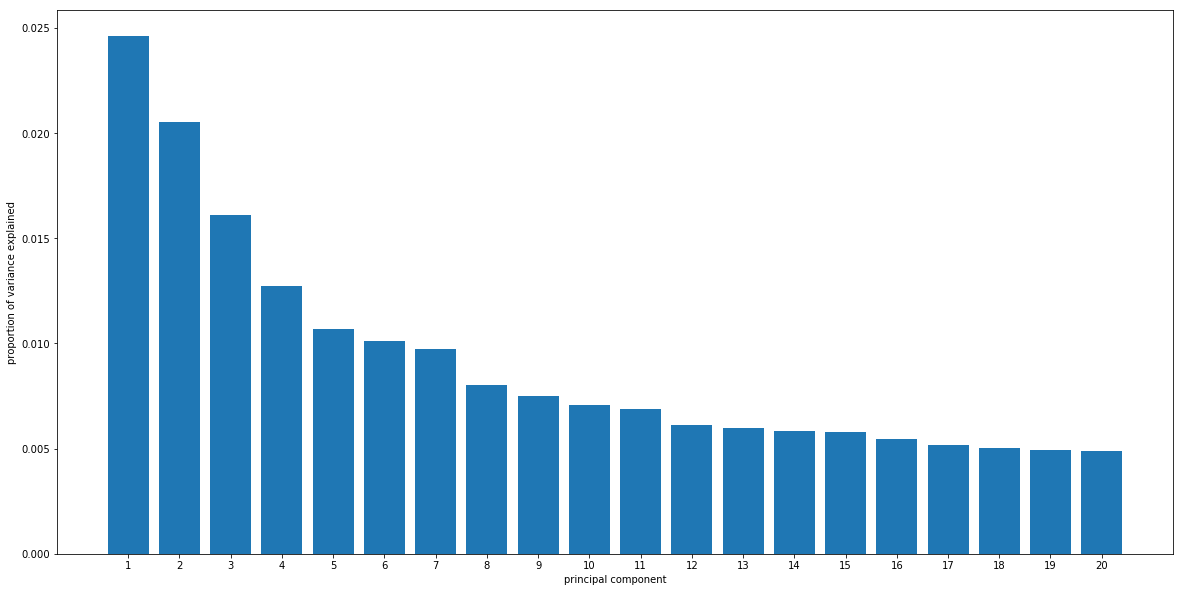

In [64]:
# Create bar plot
fig = plt.figure(figsize = (20,10))
xcor = np.arange(1, 21) # 1,2,..,n_components
plt.bar(xcor, pve[:20])
plt.xticks(xcor)



# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')

plt.show()

We can see that each component only explains a very small amount of variance (around 2%).
The figure below displays the cumulative proportion of variance explained by all components. 

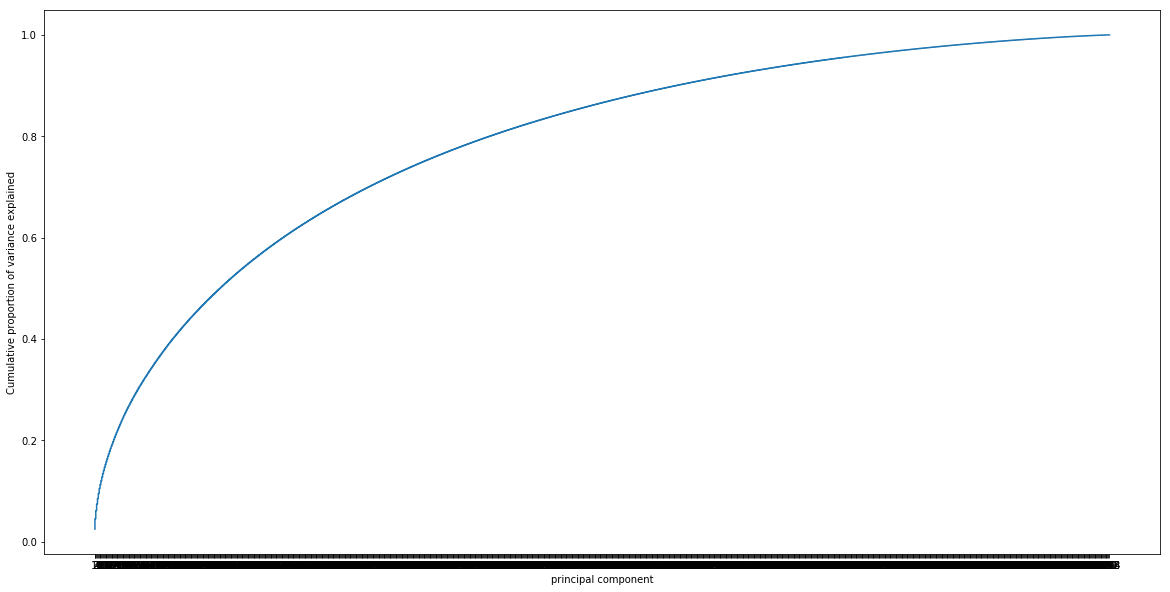

In [65]:
# Create bar plot
fig = plt.figure(figsize = (20,10))
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.xticks(xcor)
# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)
# Add labels
plt.xlabel('principal component')
plt.ylabel('Cumulative proportion of variance explained')
plt.show()

In [66]:
#explaining 80% of variance. 

print('70% of variance explained by {} components.'.format(np.sum(pve_cumsum<0.7)))
print('80% of variance explained by {} components.'.format(np.sum(pve_cumsum<0.8)))
print('90% of variance explained by {} components.'.format(np.sum(pve_cumsum<0.9)))

70% of variance explained by 323 components.
80% of variance explained by 465 components.
90% of variance explained by 685 components.


As we are interested in seeing if any preliminary trend can be highlighted before the classification task, we project the posts colored by category on the first two components: 

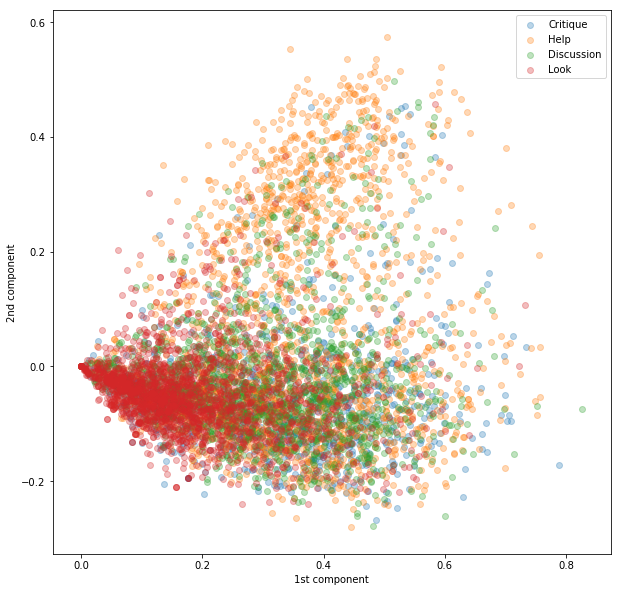

In [67]:

#project data on the first two components
pca_2d = truncatedSVD.transform(X_train_tfidf)
fig = plt.figure(figsize = (10, 10))
for kind in pd.unique(train_y):
    # Wine samples of this type
    idx = (train_y == kind)

    # Plot their components
    plt.scatter(
        pca_2d[idx, 0], pca_2d[idx, 1],
        label='{}'.format(kind), alpha = 0.3
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

It is difficult to see a trend on the figure with all observations, so we split the projection per Reconciled Flair: 

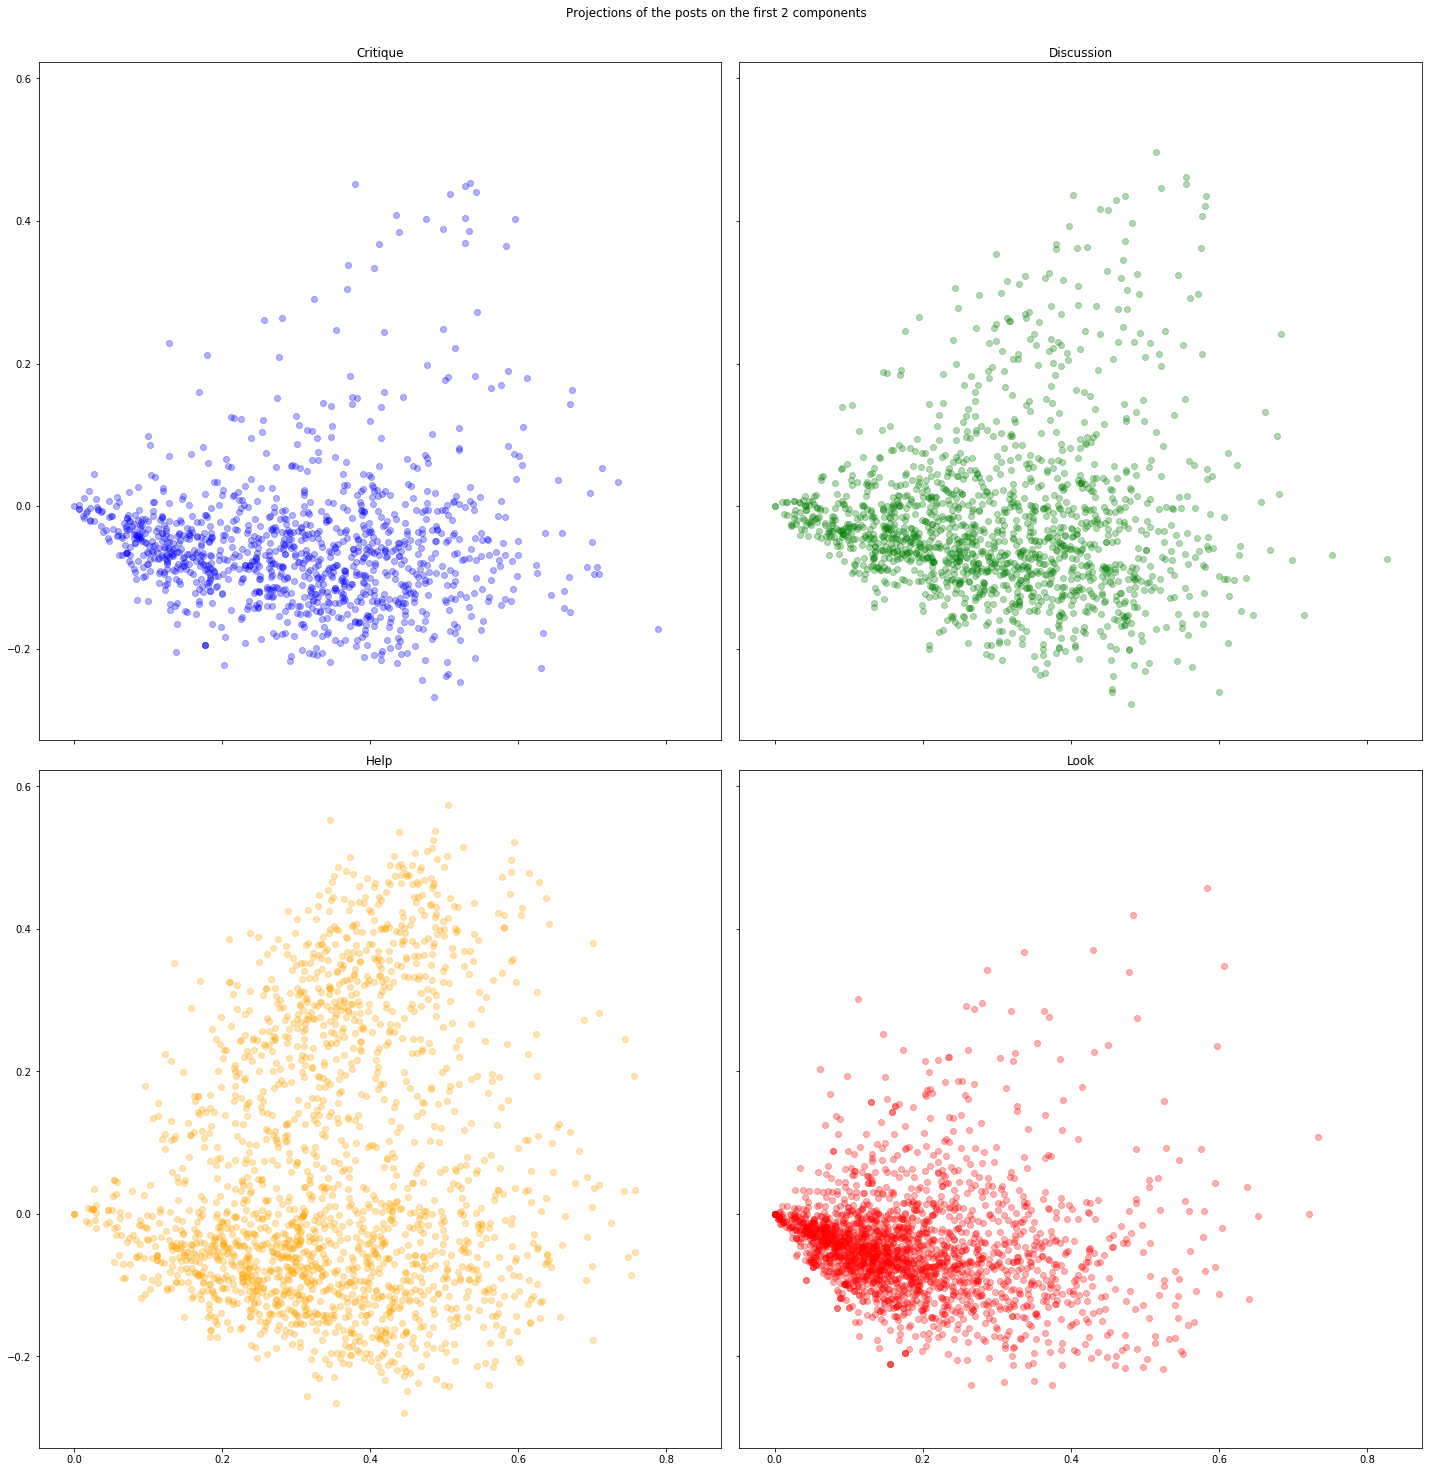

In [68]:
#project data on the first two components
pca_2d = truncatedSVD.transform(X_train_tfidf)

# Plotting distribution of number of words in Title, OP Text and Comments per posts 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols=2, sharex = True, sharey = True,  figsize=(20,20))
fig.subplots_adjust(top=0.8)
idx1 = (train_y == "Critique")
idx2 = (train_y == "Discussion")
idx3 = (train_y == "Help")
idx4 = (train_y == "Look")


ax1.scatter(
    pca_2d[idx1, 0], pca_2d[idx1, 1],
    label='{}'.format("Critique"), alpha = 0.3, color = "blue"
)



ax2.scatter(
    pca_2d[idx2, 0], pca_2d[idx2, 1],
    label='{}'.format("Discussion"), alpha = 0.3, color = "green"
)

ax3.scatter(
    pca_2d[idx3, 0], pca_2d[idx3, 1],
    label='{}'.format("Help"), alpha = 0.3, color = "orange"
)

ax4.scatter(
    pca_2d[idx4, 0], pca_2d[idx4, 1],
    label='{}'.format("Look"), alpha = 0.3, color = "red"
)
ax1.set_title("Critique")
ax2.set_title("Discussion")
ax3.set_title("Help")
ax4.set_title("Look")


plt.suptitle("Projections of the posts on the first 2 components", y=1.02)

plt.tight_layout()
plt.show()

We can see, that most of the groups overlap, except for a sub-group of Help posts, that is opposed to the others on the second component. 
All we can say at the moment is that individual variability between the posts text content is stronger than the variability due to the appartenance to a certain Flair. 

As we identified earlier that Posts in the Look flair were all posted before the first of July 2021, we split the posts into 2 : those, that were posted before the 1st of June 2021 and those posted after, and use this category to color the projection of the posts on the first two components.  

In [69]:
import datetime
train_x["date_flag"] = train_x["day"].apply(lambda x: "Before 01.06.2021" if x < datetime.date(2021, 6, 1) else "After 01.06.2021")

C:\Users\Valou\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


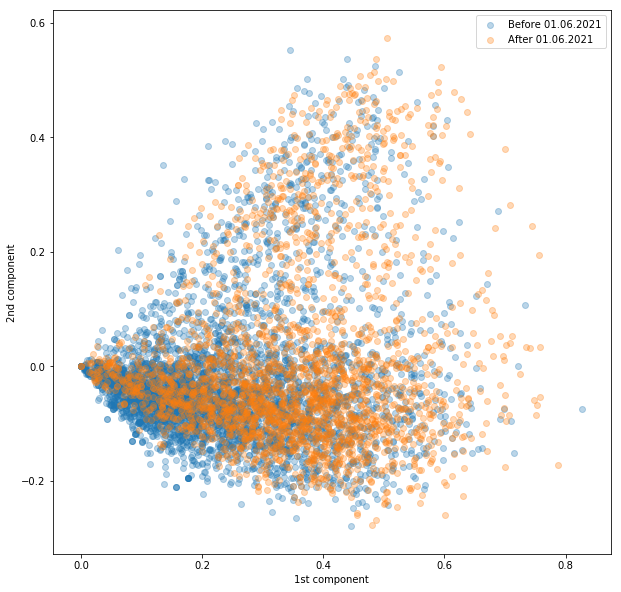

In [70]:
y = train_x.date_flag

fig = plt.figure(figsize = (10, 10))
for kind in pd.unique(y):
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        pca_2d[idx, 0], pca_2d[idx, 1],
        label='{}'.format(kind), alpha = 0.3
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

We can see on this figure that posts before and after the 01.06.2021 are all uniformely scattered on the projection, thus the fact that the Look posts are all before a certain date, should not interfere with the remainder of our analysis. 

### 5) Saving data

We have reached the end of the EDA steps. Our datset is cleaned, with no missing values in our features of interest and no duplicates. 
The text features have been satisfyingly preprocessed: We have removed the case, punctuations, numbers and urls. Words have been lemmatized, checked for spellings and tokenized, then we have used the TF-IDF vectorizer to embed them numerically, rendering them suitable for machine learning processing. 
By tuning the parameters of the TF-IDF vectorizer, we have reduced the vocabulary from more than 18,000 words to 1195 words and bigrams, reducing the noise in our data and selecting features with the most information for our classifiers. 


Now that we are satisfied, we can finally save our data. 

In [71]:
#save train dataframe for reference
import os
save_train = './data/train'
isExist = os.path.exists(save_train)
if not isExist: 
    # Create a new directory because it does not exist 
    os.makedirs(save_train)
    print("The train directory is created!")

complete_name = os.path.join(save_train,'train_preprocessed_sourdough.csv')
train_x.to_csv(complete_name, sep='\t')

In [72]:
#save test dataframe for reference
save_test = './data/test'
isExist = os.path.exists(save_test)
if not isExist: 
    # Create a new directory because it does not exist 
    os.makedirs(save_test)
    print("The test directory is created!")
complete_name = os.path.join(save_test,'test_preprocessed_sourdough.csv')
test_x.to_csv(complete_name, sep='\t')

In [73]:
# pickle best parameters for tf_idf 
import pickle

save_tf_idf = open("./data/train/Tfidf_parameters.pickle", 'wb')  
pickle.dump(tf_idf_search, save_tf_idf) 
save_tf_idf.close() 